# Economy VDA & EDA

## 1. Data Preparation

In [1]:
import bs4 as bs
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import wraps

In [2]:
df_gdp = pd.read_csv('gdppercapita_us_inflation_adjusted.csv')
df_hdi = pd.read_csv('hdi_human_development_index.csv')
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_life = pd.read_csv('life_expectancy_years.csv')
df_thsp = pd.read_csv('total_health_spending_percent_of_gdp.csv')
df_regions = pd.read_csv('world_regions.csv')
df_emissions = pd.read_csv('co2_emissions_tonnes_per_person.csv')

## 2. Data Information

In [3]:
df_gdp.shape, df_hdi.shape, df_income.shape, df_life.shape, df_thsp.shape, df_regions.shape, df_emissions.shape
# Get know how many rows and columns

((210, 62),
 (189, 31),
 (195, 252),
 (195, 302),
 (192, 17),
 (249, 11),
 (194, 220))

In [4]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 62 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  210 non-null    object
 1   1960     87 non-null     object
 2   1961     91 non-null     object
 3   1962     91 non-null     object
 4   1963     91 non-null     object
 5   1964     91 non-null     object
 6   1965     95 non-null     object
 7   1966     98 non-null     object
 8   1967     99 non-null     object
 9   1968     101 non-null    object
 10  1969     101 non-null    object
 11  1970     111 non-null    object
 12  1971     111 non-null    object
 13  1972     111 non-null    object
 14  1973     111 non-null    object
 15  1974     113 non-null    object
 16  1975     115 non-null    object
 17  1976     117 non-null    object
 18  1977     123 non-null    object
 19  1978     123 non-null    object
 20  1979     124 non-null    object
 21  1980     136 non-null    object
 22  19

In [5]:
df_gdp.describe()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,210,87,91,91,91,91,95,98,99,101,...,205,204,206,206,209,205,205,204,202,195
unique,210,82,82,84,89,84,91,90,97,99,...,191,192,190,193,194,195,190,187,189,183
top,Aruba,1160,1200,1170,1140,1570,14.5k,1540,4110,4960,...,14.1k,11.5k,11.7k,1340,35.8k,15.8k,13.6k,38.3k,11.4k,4050
freq,1,2,4,3,2,2,2,3,2,2,...,3,3,2,3,3,2,4,3,3,3


In [6]:
missing_gdp = df_gdp.isnull().sum()
Total_miss_gdp = df_gdp.isnull().sum().sum()

print(missing_gdp)
print('Total missing values: {}'.format(Total_miss_gdp))
display(df_gdp.head(10))
#Chcek missing values

country      0
1960       123
1961       119
1962       119
1963       119
          ... 
2016         5
2017         5
2018         6
2019         8
2020        15
Length: 62, dtype: int64
Total missing values: 3215


,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.6k,26.2k,27.1k,27k,28.4k,28.8k,29.3k,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,512,558,569,565,556,553,553,547,555,530
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3980,4170,4220,4270,4170,3920,3790,3600,3460,3170
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3680,3740,3780,3860,3950,4090,4250,4430,4540,4390
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35k,33.8k,33.2k,34.7k,35.8k,37.4k,37.7k,38.3k,39k,34.3k
5,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.2k,34k,35.5k,37k,38.7k,39.4k,39.8k,39.7k,40.4k,37.5k
6,Argentina,7360,7640,7450,6950,7530,8200,8030,8160,8430,...,14.2k,13.9k,14.1k,13.6k,13.8k,13.4k,13.6k,13.1k,12.7k,11.3k
7,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3100,3310,3410,3510,3610,3600,3860,4050,4350,4020
8,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.3k,11.8k,11.5k,11.7k,12.1k,11.9k,11.1k,11.4k,11.4k,11.8k
9,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.5k,13.8k,13.6k,13.9k,14.3k,14.9k,15.2k,16.1k,16.8k,13.3k


In [7]:
Proportion_miss_gdp = 100*Total_miss_gdp / (df_gdp.shape[0] * df_gdp.shape[1])
Proportion_miss_gdp

24.692780337941628

In [8]:
df_hdi.info()
df_hdi.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  189 non-null    object 
 1   1990     144 non-null    float64
 2   1991     144 non-null    float64
 3   1992     144 non-null    float64
 4   1993     144 non-null    float64
 5   1994     144 non-null    float64
 6   1995     148 non-null    float64
 7   1996     148 non-null    float64
 8   1997     148 non-null    float64
 9   1998     148 non-null    float64
 10  1999     151 non-null    float64
 11  2000     174 non-null    float64
 12  2001     174 non-null    float64
 13  2002     175 non-null    float64
 14  2003     176 non-null    float64
 15  2004     178 non-null    float64
 16  2005     185 non-null    float64
 17  2006     186 non-null    float64
 18  2007     186 non-null    float64
 19  2008     186 non-null    float64
 20  2009     186 non-null    float64
 21  2010     188 non

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,144.000000,144.000000,144.000000,144.000000,144.000000,148.000000,148.000000,148.000000,148.000000,151.000000,...,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,189.000000,189.000000,189.000000
mean,0.599653,0.601854,0.604187,0.608229,0.612347,0.615669,0.621007,0.626182,0.631446,0.632318,...,0.687197,0.692713,0.697676,0.702644,0.706777,0.710511,0.713367,0.716783,0.719423,0.722423
std,0.165550,0.166086,0.166821,0.167933,0.169730,0.168708,0.168904,0.169017,0.169395,0.170653,...,0.156575,0.155098,0.153803,0.152750,0.152036,0.151868,0.151803,0.150598,0.150379,0.149791
min,0.220000,0.220000,0.202000,0.197000,0.192000,0.231000,0.244000,0.248000,0.255000,0.259000,...,0.331000,0.338000,0.350000,0.357000,0.365000,0.372000,0.378000,0.386000,0.391000,0.394000
25%,0.480250,0.480750,0.475500,0.476750,0.483000,0.480000,0.476500,0.477750,0.484000,0.474000,...,0.551750,0.563500,0.571250,0.577500,0.578250,0.586000,0.588000,0.595000,0.599000,0.602000
50%,0.628000,0.634000,0.630500,0.637000,0.638000,0.637500,0.646500,0.645500,0.656000,0.654000,...,0.719500,0.724000,0.728500,0.729000,0.733000,0.737500,0.738000,0.736000,0.738000,0.740000
75%,0.732000,0.733000,0.735250,0.739250,0.746250,0.749000,0.757000,0.764500,0.769250,0.774500,...,0.803500,0.806000,0.808000,0.816500,0.821250,0.824500,0.826250,0.822000,0.826000,0.829000
max,0.871000,0.871000,0.873000,0.877000,0.883000,0.888000,0.890000,0.893000,0.904000,0.909000,...,0.941000,0.942000,0.944000,0.946000,0.944000,0.947000,0.950000,0.954000,0.956000,0.957000


In [9]:
missing_hdi = df_hdi.isnull().sum()
Total_miss_hdi = df_hdi.isnull().sum().sum()
print(missing_hdi)
print('Total missing values: {}'.format(Total_miss_hdi))
display(df_hdi.head())

country     0
1990       45
1991       45
1992       45
1993       45
1994       45
1995       41
1996       41
1997       41
1998       41
1999       38
2000       15
2001       15
2002       14
2003       13
2004       11
2005        4
2006        3
2007        3
2008        3
2009        3
2010        1
2011        1
2012        1
2013        1
2014        1
2015        1
2016        1
2017        0
2018        0
2019        0
dtype: int64
Total missing values: 518


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,0.344,...,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
2,Albania,0.650,0.631,0.615,0.618,0.624,0.637,0.646,0.645,0.655,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,United Arab Emirates,0.723,0.735,0.738,0.745,0.755,0.764,0.765,0.766,0.769,...,0.820,0.826,0.832,0.838,0.847,0.859,0.864,0.881,0.889,0.890


In [10]:
df_income.info()
df_income.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 252 entries, country to 2050
dtypes: int64(101), object(151)
memory usage: 384.0+ KB


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,1072.179487,1071.353846,1074.210256,1073.753846,1075.430769,1075.174359,1076.169231,1076.251282,1066.497436,1067.553846,...,1796.825641,1819.466667,1839.246154,1873.189744,1886.882051,1917.348718,1924.005128,1957.410256,1981.030769,1987.743590
std,605.373041,602.816015,614.245612,608.330435,617.123397,610.442792,612.281097,606.053716,564.608763,569.926448,...,1431.441055,1433.272527,1418.456847,1441.871804,1476.487543,1518.852409,1516.524093,1559.755626,1604.763852,1616.979912
min,224.000000,224.000000,224.000000,224.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,...,334.000000,337.000000,339.000000,342.000000,345.000000,348.000000,351.000000,354.000000,357.000000,360.000000
25%,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,...,883.000000,903.000000,932.500000,935.500000,939.000000,948.000000,948.500000,950.500000,955.000000,957.000000
50%,959.000000,959.000000,959.000000,959.000000,954.000000,954.000000,956.000000,960.000000,960.000000,960.000000,...,1250.000000,1290.000000,1290.000000,1300.000000,1300.000000,1310.000000,1310.000000,1320.000000,1320.000000,1330.000000
75%,1240.000000,1240.000000,1240.000000,1245.000000,1250.000000,1250.000000,1255.000000,1255.000000,1255.000000,1255.000000,...,2185.000000,2220.000000,2250.000000,2305.000000,2340.000000,2350.000000,2335.000000,2430.000000,2455.000000,2410.000000
max,4860.000000,4780.000000,5040.000000,4930.000000,5170.000000,4860.000000,4900.000000,4490.000000,3780.000000,3850.000000,...,8650.000000,8510.000000,7940.000000,7960.000000,8320.000000,8380.000000,8610.000000,8720.000000,9250.000000,9340.000000


In [11]:
missing_income = df_income.isnull().sum()
Total_miss_income = df_income.isnull().sum().sum()
print(missing_income)
print('Total missing values: {}'.format(Total_miss_income))
display(df_income.head())

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2046       0
2047       0
2048       0
2049       0
2050       0
Length: 252, dtype: int64
Total missing values: 0


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
1,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
2,Albania,755,755,755,755,755,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
3,Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k
4,United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,...,101k,103k,105k,107k,110k,112k,114k,117k,119k,122k


In [12]:
df_life.info()
df_life.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,31.503763,31.463441,31.480108,31.385484,31.460753,31.586559,31.644086,31.598387,31.385484,31.313441,...,83.361828,83.476344,83.600538,83.717742,83.838172,83.955376,84.076344,84.193548,84.312903,84.430645
std,3.809510,3.801217,3.932344,3.955872,3.928388,4.003874,4.102694,3.974506,4.080230,4.033412,...,5.803782,5.797854,5.788922,5.777904,5.770755,5.766333,5.756555,5.750616,5.743805,5.741341
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,66.400000,66.500000,66.700000,66.800000,66.900000,67.000000,67.100000,67.200000,67.300000,67.400000
25%,29.025000,28.925000,28.900000,28.900000,28.925000,29.025000,29.025000,29.025000,28.925000,28.825000,...,79.650000,79.750000,79.925000,80.025000,80.150000,80.325000,80.425000,80.525000,80.700000,80.800000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,84.000000,84.100000,84.250000,84.300000,84.500000,84.600000,84.700000,84.800000,84.900000,85.000000
75%,33.875000,33.900000,33.875000,33.675000,33.775000,33.875000,33.975000,33.975000,33.775000,33.675000,...,87.775000,87.875000,87.975000,88.075000,88.175000,88.300000,88.400000,88.500000,88.675000,88.775000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,93.400000,93.500000,93.600000,93.700000,93.800000,94.000000,94.100000,94.200000,94.300000,94.400000


In [13]:
missing_life = df_life.isnull().sum()
Total_miss_life = df_life.isnull().sum().sum()
print(missing_life)
print('Total missing values: {}'.format(Total_miss_life))
display(df_life.head())

country    0
1800       9
1801       9
1802       9
1803       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64
Total missing values: 2079


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [14]:
df_thsp.info()
df_thsp.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  192 non-null    object 
 1   1995     189 non-null    float64
 2   1996     190 non-null    float64
 3   1997     190 non-null    float64
 4   1998     191 non-null    float64
 5   1999     191 non-null    float64
 6   2000     191 non-null    float64
 7   2001     190 non-null    float64
 8   2002     190 non-null    float64
 9   2003     190 non-null    float64
 10  2004     190 non-null    float64
 11  2005     190 non-null    float64
 12  2006     190 non-null    float64
 13  2007     190 non-null    float64
 14  2008     190 non-null    float64
 15  2009     190 non-null    float64
 16  2010     187 non-null    float64
dtypes: float64(16), object(1)
memory usage: 25.6+ KB


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
count,189.000000,190.000000,190.000000,191.000000,191.000000,191.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,187.000000
mean,5.790265,5.901316,5.939000,6.067330,6.019634,6.064555,6.175632,6.311895,6.373789,6.457947,6.534316,6.549789,6.641684,6.688789,7.121263,6.994545
std,2.448863,2.655962,2.593936,2.620681,2.493125,2.645971,2.572764,2.565992,2.601206,2.689196,2.846983,2.961126,3.054101,3.001143,2.985682,3.014348
min,1.950000,1.690000,1.690000,1.740000,1.730000,1.930000,1.990000,1.120000,2.280000,2.090000,1.700000,1.820000,1.900000,1.920000,2.120000,1.810000
25%,3.930000,3.962500,4.145000,4.415000,4.375000,4.375000,4.580000,4.495000,4.647500,4.402500,4.470000,4.427500,4.692500,4.555000,4.927500,4.920000
50%,5.250000,5.425000,5.535000,5.580000,5.750000,5.790000,5.690000,5.965000,5.920000,6.030000,6.165000,6.220000,6.105000,6.045000,6.570000,6.590000
75%,7.070000,7.410000,7.310000,7.290000,7.345000,7.330000,7.415000,7.937500,7.705000,8.020000,8.145000,8.145000,8.115000,8.332500,9.117500,8.715000
max,18.100000,21.800000,22.900000,20.900000,20.400000,22.600000,19.500000,18.300000,21.100000,16.400000,17.600000,18.600000,21.700000,20.600000,18.900000,18.100000


In [15]:
missing_thsp = df_thsp.isnull().sum()
Total_miss_thsp = df_thsp.isnull().sum().sum()
print(missing_thsp)
print('Total missing values: {}'.format(Total_miss_thsp))
display(df_thsp.head())

country    0
1995       3
1996       2
1997       2
1998       1
1999       1
2000       1
2001       2
2002       2
2003       2
2004       2
2005       2
2006       2
2007       2
2008       2
2009       2
2010       5
dtype: int64
Total missing values: 33


,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.72,6.82,6.36,6.63,6.77,7.30,6.98,7.58,7.58
1,Angola,3.79,2.17,2.26,1.85,1.94,2.41,3.45,2.36,2.64,2.09,1.96,2.42,2.52,3.19,4.95,2.85
2,Albania,2.56,4.04,4.81,5.34,5.83,6.35,6.04,6.28,6.16,6.88,6.84,6.73,6.88,6.75,6.88,6.55
3,Andorra,7.64,8.03,8.03,9.85,7.35,7.58,6.79,7.04,7.12,7.11,7.22,7.44,7.55,7.54,7.52,7.52
4,United Arab Emirates,2.64,2.46,2.49,3.06,2.90,2.57,2.48,2.72,2.65,2.46,2.32,2.33,2.52,3.01,4.37,3.66


In [16]:
df_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   alpha-3                   249 non-null    object 
 3   country-code              249 non-null    int64  
 4   iso_3166-2                249 non-null    object 
 5   region                    248 non-null    object 
 6   sub-region                248 non-null    object 
 7   intermediate-region       107 non-null    object 
 8   region-code               248 non-null    float64
 9   sub-region-code           248 non-null    float64
 10  intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


In [17]:
missing_regions = df_regions.isnull().sum()
Total_miss_regions = df_regions.isnull().sum().sum()
print(missing_regions)
print('Total missing values: {}'.format(Total_miss_regions))
display(df_regions.head())

name                          0
alpha-2                       1
alpha-3                       0
country-code                  0
iso_3166-2                    0
region                        1
sub-region                    1
intermediate-region         142
region-code                   1
sub-region-code               1
intermediate-region-code    142
dtype: int64
Total missing values: 289


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [18]:
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 220 entries, country to 2018
dtypes: float64(215), object(5)
memory usage: 333.6+ KB


In [19]:
missing_emissions = df_emissions.isnull().sum()
Total_miss_emissions = df_emissions.isnull().sum().sum()
print(missing_emissions)
print('Total missing values: {}'.format(Total_miss_emissions))
display(df_emissions.head())

country      0
1800       189
1801       189
1802       187
1803       189
          ... 
2014         0
2015         0
2016         0
2017         0
2018         0
Length: 220, dtype: int64
Total missing values: 24249


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


## 3. Data Cleaning

In [20]:
df_gdp_1 = df_gdp.melt(id_vars=['country'], var_name='year', value_name='gdp_per_capita')
df_gdp_1.sort_values(by = ['country','year'], inplace=True)

df_hdi_1 = df_hdi.melt(id_vars=['country'], var_name='year', value_name='human_development_index')
df_hdi_1.sort_values(by = ['country','year'], inplace=True)

df_income_1 = df_income.melt(id_vars=['country'], var_name='year', value_name='income_per_person')
df_income_1.sort_values(by = ['country','year'], inplace=True)

df_life_1 = df_life.melt(id_vars=['country'], var_name='year', value_name='life_expectancy')
df_life_1.sort_values(by = ['country','year'], inplace=True)

df_thsp_1 = df_thsp.melt(id_vars=['country'], var_name='year', value_name='total_health_spending')
df_thsp_1.sort_values(by = ['country','year'], inplace=True)

df_emissions_1 = df_emissions.melt(id_vars=['country'], var_name='year', value_name='emissions_per_person')
df_emissions_1.sort_values(by = ['country','year'], inplace=True)
#reference: https://github.com/jmlcode/p1-investigate-datasets/blob/master/p1_investigate_datasets.ipynb

In [21]:
df_gdp_hdi = df_gdp_1.merge(right = df_hdi_1, on = ['country','year'])
df_gdp_hdi

,country,year,gdp_per_capita,human_development_index
0,Afghanistan,1990,NaN,0.302
1,Afghanistan,1991,NaN,0.307
2,Afghanistan,1992,NaN,0.316
3,Afghanistan,1993,NaN,0.312
4,Afghanistan,1994,NaN,0.307
...,...,...,...,...
5635,Zimbabwe,2015,1450,0.553
5636,Zimbabwe,2016,1430,0.558
5637,Zimbabwe,2017,1480,0.563
5638,Zimbabwe,2018,1530,0.569


In [22]:
df_gdp_hdi_income = df_gdp_hdi.merge(right = df_income_1, on = ['country','year'])
df_gdp_hdi_income

,country,year,gdp_per_capita,human_development_index,income_per_person
0,Afghanistan,1990,NaN,0.302,1120
1,Afghanistan,1991,NaN,0.307,1020
2,Afghanistan,1992,NaN,0.316,981
3,Afghanistan,1993,NaN,0.312,672
4,Afghanistan,1994,NaN,0.307,498
...,...,...,...,...,...
5605,Zimbabwe,2015,1450,0.553,3710
5606,Zimbabwe,2016,1430,0.558,3680
5607,Zimbabwe,2017,1480,0.563,3800
5608,Zimbabwe,2018,1530,0.569,3920


In [23]:
df_gdp_hdi_income_life = df_gdp_hdi_income.merge(right = df_life_1, on = ['country','year'])
df_gdp_hdi_income_life

,country,year,gdp_per_capita,human_development_index,income_per_person,life_expectancy
0,Afghanistan,1990,NaN,0.302,1120,53.8
1,Afghanistan,1991,NaN,0.307,1020,53.8
2,Afghanistan,1992,NaN,0.316,981,54.2
3,Afghanistan,1993,NaN,0.312,672,54.4
4,Afghanistan,1994,NaN,0.307,498,53.9
...,...,...,...,...,...,...
5605,Zimbabwe,2015,1450,0.553,3710,58.6
5606,Zimbabwe,2016,1430,0.558,3680,59.2
5607,Zimbabwe,2017,1480,0.563,3800,59.9
5608,Zimbabwe,2018,1530,0.569,3920,60.6


In [24]:
df_gdp_hdi_income_life_health = df_gdp_hdi_income_life.merge(right = df_thsp_1, on = ['country','year'])
df_gdp_hdi_income_life_health

,country,year,gdp_per_capita,human_development_index,income_per_person,life_expectancy,total_health_spending
0,Afghanistan,1995,NaN,0.331,736,54.3,NaN
1,Afghanistan,1996,NaN,0.335,698,54.7,NaN
2,Afghanistan,1997,NaN,0.339,663,54.5,NaN
3,Afghanistan,1998,NaN,0.344,634,53.3,NaN
4,Afghanistan,1999,NaN,0.348,603,54.7,NaN
...,...,...,...,...,...,...,...
2939,Zimbabwe,2006,1090,0.414,2800,47.4,NaN
2940,Zimbabwe,2007,1040,0.421,2670,48.2,NaN
2941,Zimbabwe,2008,850,0.422,2180,48.9,NaN
2942,Zimbabwe,2009,941,0.458,2410,50.2,NaN


In [25]:
df_gdp_hdi_income_life_health_emissions = df_gdp_hdi_income_life_health.merge(right = df_emissions_1, on=['country','year'])
df_gdp_hdi_income_life_health_emissions

,country,year,gdp_per_capita,human_development_index,income_per_person,life_expectancy,total_health_spending,emissions_per_person
0,Afghanistan,1995,NaN,0.331,736,54.3,NaN,0.068
1,Afghanistan,1996,NaN,0.335,698,54.7,NaN,0.0619
2,Afghanistan,1997,NaN,0.339,663,54.5,NaN,0.0561
3,Afghanistan,1998,NaN,0.344,634,53.3,NaN,0.0522
4,Afghanistan,1999,NaN,0.348,603,54.7,NaN,0.0402
...,...,...,...,...,...,...,...,...
2939,Zimbabwe,2006,1090,0.414,2800,47.4,NaN,0.853
2940,Zimbabwe,2007,1040,0.421,2670,48.2,NaN,0.803
2941,Zimbabwe,2008,850,0.422,2180,48.9,NaN,0.624
2942,Zimbabwe,2009,941,0.458,2410,50.2,NaN,0.441


In [26]:
df_regions.rename(columns = {'name':'country'}, inplace=True)

In [27]:
df_gdp_hdi_income_life_emissions = df_gdp_hdi_income_life.merge(right = df_emissions_1, on=['country','year'])
df_gdp_hdi_income_life_emissions

,country,year,gdp_per_capita,human_development_index,income_per_person,life_expectancy,emissions_per_person
0,Afghanistan,1990,NaN,0.302,1120,53.8,0.21
1,Afghanistan,1991,NaN,0.307,1020,53.8,0.183
2,Afghanistan,1992,NaN,0.316,981,54.2,0.0954
3,Afghanistan,1993,NaN,0.312,672,54.4,0.0844
4,Afghanistan,1994,NaN,0.307,498,53.9,0.0752
...,...,...,...,...,...,...,...
5418,Zimbabwe,2014,1440,0.547,3700,58.0,0.881
5419,Zimbabwe,2015,1450,0.553,3710,58.6,0.881
5420,Zimbabwe,2016,1430,0.558,3680,59.2,0.771
5421,Zimbabwe,2017,1480,0.563,3800,59.9,0.845


In [28]:
#This DataFrame does not include total health spending, because the health data only counts to 2010. 

In [29]:
df_no_health = df_gdp_hdi_income_life_emissions.merge(df_regions[['country','region']], on=['country'])
df_no_health 

,country,year,gdp_per_capita,human_development_index,income_per_person,life_expectancy,emissions_per_person,region
0,Afghanistan,1990,NaN,0.302,1120,53.8,0.21,Asia
1,Afghanistan,1991,NaN,0.307,1020,53.8,0.183,Asia
2,Afghanistan,1992,NaN,0.316,981,54.2,0.0954,Asia
3,Afghanistan,1993,NaN,0.312,672,54.4,0.0844,Asia
4,Afghanistan,1994,NaN,0.307,498,53.9,0.0752,Asia
...,...,...,...,...,...,...,...,...
4664,Zimbabwe,2014,1440,0.547,3700,58.0,0.881,Africa
4665,Zimbabwe,2015,1450,0.553,3710,58.6,0.881,Africa
4666,Zimbabwe,2016,1430,0.558,3680,59.2,0.771,Africa
4667,Zimbabwe,2017,1480,0.563,3800,59.9,0.845,Africa


In [30]:
#This DataFrame include all metrics. 
df_overall = df_gdp_hdi_income_life_health_emissions.merge(df_regions[['country','region']], on=['country'])
df_overall

,country,year,gdp_per_capita,human_development_index,income_per_person,life_expectancy,total_health_spending,emissions_per_person,region
0,Afghanistan,1995,NaN,0.331,736,54.3,NaN,0.068,Asia
1,Afghanistan,1996,NaN,0.335,698,54.7,NaN,0.0619,Asia
2,Afghanistan,1997,NaN,0.339,663,54.5,NaN,0.0561,Asia
3,Afghanistan,1998,NaN,0.344,634,53.3,NaN,0.0522,Asia
4,Afghanistan,1999,NaN,0.348,603,54.7,NaN,0.0402,Asia
...,...,...,...,...,...,...,...,...,...
2555,Zimbabwe,2006,1090,0.414,2800,47.4,NaN,0.853,Africa
2556,Zimbabwe,2007,1040,0.421,2670,48.2,NaN,0.803,Africa
2557,Zimbabwe,2008,850,0.422,2180,48.9,NaN,0.624,Africa
2558,Zimbabwe,2009,941,0.458,2410,50.2,NaN,0.441,Africa


In [31]:
Missings = df_overall.isnull().sum()
Missings

country                      0
year                         0
gdp_per_capita              57
human_development_index    223
income_per_person            0
life_expectancy              0
total_health_spending       23
emissions_per_person         7
region                       0
dtype: int64

In [32]:
Total_miss_overall = df_overall.isnull().sum().sum()
Proportion_miss = 100*Total_miss_overall / (df_overall.shape[0] * df_overall.shape[1])
print('Total missing values: {}'.format(Total_miss_overall))
print('Missing values proportion: {:.2f}%'.format(Proportion_miss))

Total missing values: 310
Missing values proportion: 1.35%


In [33]:
#drop missing values
df_no_health = df_no_health.dropna().reset_index(drop=True)
print(df_no_health)

          country  year gdp_per_capita  human_development_index  \
0     Afghanistan  2002            320                    0.384   
1     Afghanistan  2003            332                    0.393   
2     Afghanistan  2004            323                    0.409   
3     Afghanistan  2005            346                    0.418   
4     Afghanistan  2006            354                    0.429   
...           ...   ...            ...                      ...   
4105     Zimbabwe  2014           1440                    0.547   
4106     Zimbabwe  2015           1450                    0.553   
4107     Zimbabwe  2016           1430                    0.558   
4108     Zimbabwe  2017           1480                    0.563   
4109     Zimbabwe  2018           1530                    0.569   

     income_per_person  life_expectancy emissions_per_person  region  
0                 1190             55.5               0.0471    Asia  
1                 1240             56.5              

In [34]:
df_overall = df_overall.dropna().reset_index(drop=True)
print(df_overall)

          country  year gdp_per_capita  human_development_index  \
0     Afghanistan  2002            320                    0.384   
1     Afghanistan  2003            332                    0.393   
2     Afghanistan  2004            323                    0.409   
3     Afghanistan  2005            346                    0.418   
4     Afghanistan  2006            354                    0.429   
...           ...   ...            ...                      ...   
2276     Zimbabwe  1997           1750                    0.447   
2277     Zimbabwe  1998           1780                    0.442   
2278     Zimbabwe  1999           1760                    0.437   
2279     Zimbabwe  2000           1700                    0.430   
2280     Zimbabwe  2001           1720                    0.431   

     income_per_person  life_expectancy  total_health_spending  \
0                 1190             55.5                   5.72   
1                 1240             56.5                   6.82 

In [35]:
# Covert string 'k' into numeric numbers
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k','')) * 1000
    return float(x)
df_overall['gdp_per_capita'] = df_overall['gdp_per_capita'].apply(value_to_float)
df_overall['income_per_person'] = df_overall['income_per_person'].apply(value_to_float)
df_no_health['gdp_per_capita'] = df_no_health['gdp_per_capita'].apply(value_to_float)
df_no_health['income_per_person'] = df_no_health['income_per_person'].apply(value_to_float)
#reference: https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe

In [36]:
gdp_per_capita = df_overall['gdp_per_capita']
gdp_per_capita

0        320.0
1        332.0
2        323.0
3        346.0
4        354.0
         ...  
2276    1750.0
2277    1780.0
2278    1760.0
2279    1700.0
2280    1720.0
Name: gdp_per_capita, Length: 2281, dtype: float64

## 4. Exploratory data analysis

In [37]:
df_overall.describe()

,gdp_per_capita,human_development_index,income_per_person,life_expectancy,total_health_spending
count,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000
mean,11678.423498,0.651394,16676.224901,68.700964,6.237690
std,16918.605266,0.167513,18637.726291,9.336200,2.354659
min,219.000000,0.231000,469.000000,32.500000,1.120000
25%,1350.000000,0.506000,3240.000000,62.200000,4.480000
50%,4120.000000,0.680000,9410.000000,71.000000,5.970000
75%,13000.000000,0.783000,22200.000000,75.900000,7.760000
max,112000.000000,0.941000,121000.000000,83.300000,17.900000


In [38]:
df_overall.corr()

,gdp_per_capita,human_development_index,income_per_person,life_expectancy,total_health_spending
gdp_per_capita,1.000000,0.689188,0.949799,0.567388,0.318034
human_development_index,0.689188,1.000000,0.742890,0.882277,0.328731
income_per_person,0.949799,0.742890,1.000000,0.608325,0.229243
life_expectancy,0.567388,0.882277,0.608325,1.000000,0.271295
total_health_spending,0.318034,0.328731,0.229243,0.271295,1.000000


### 4.1 Heatmap

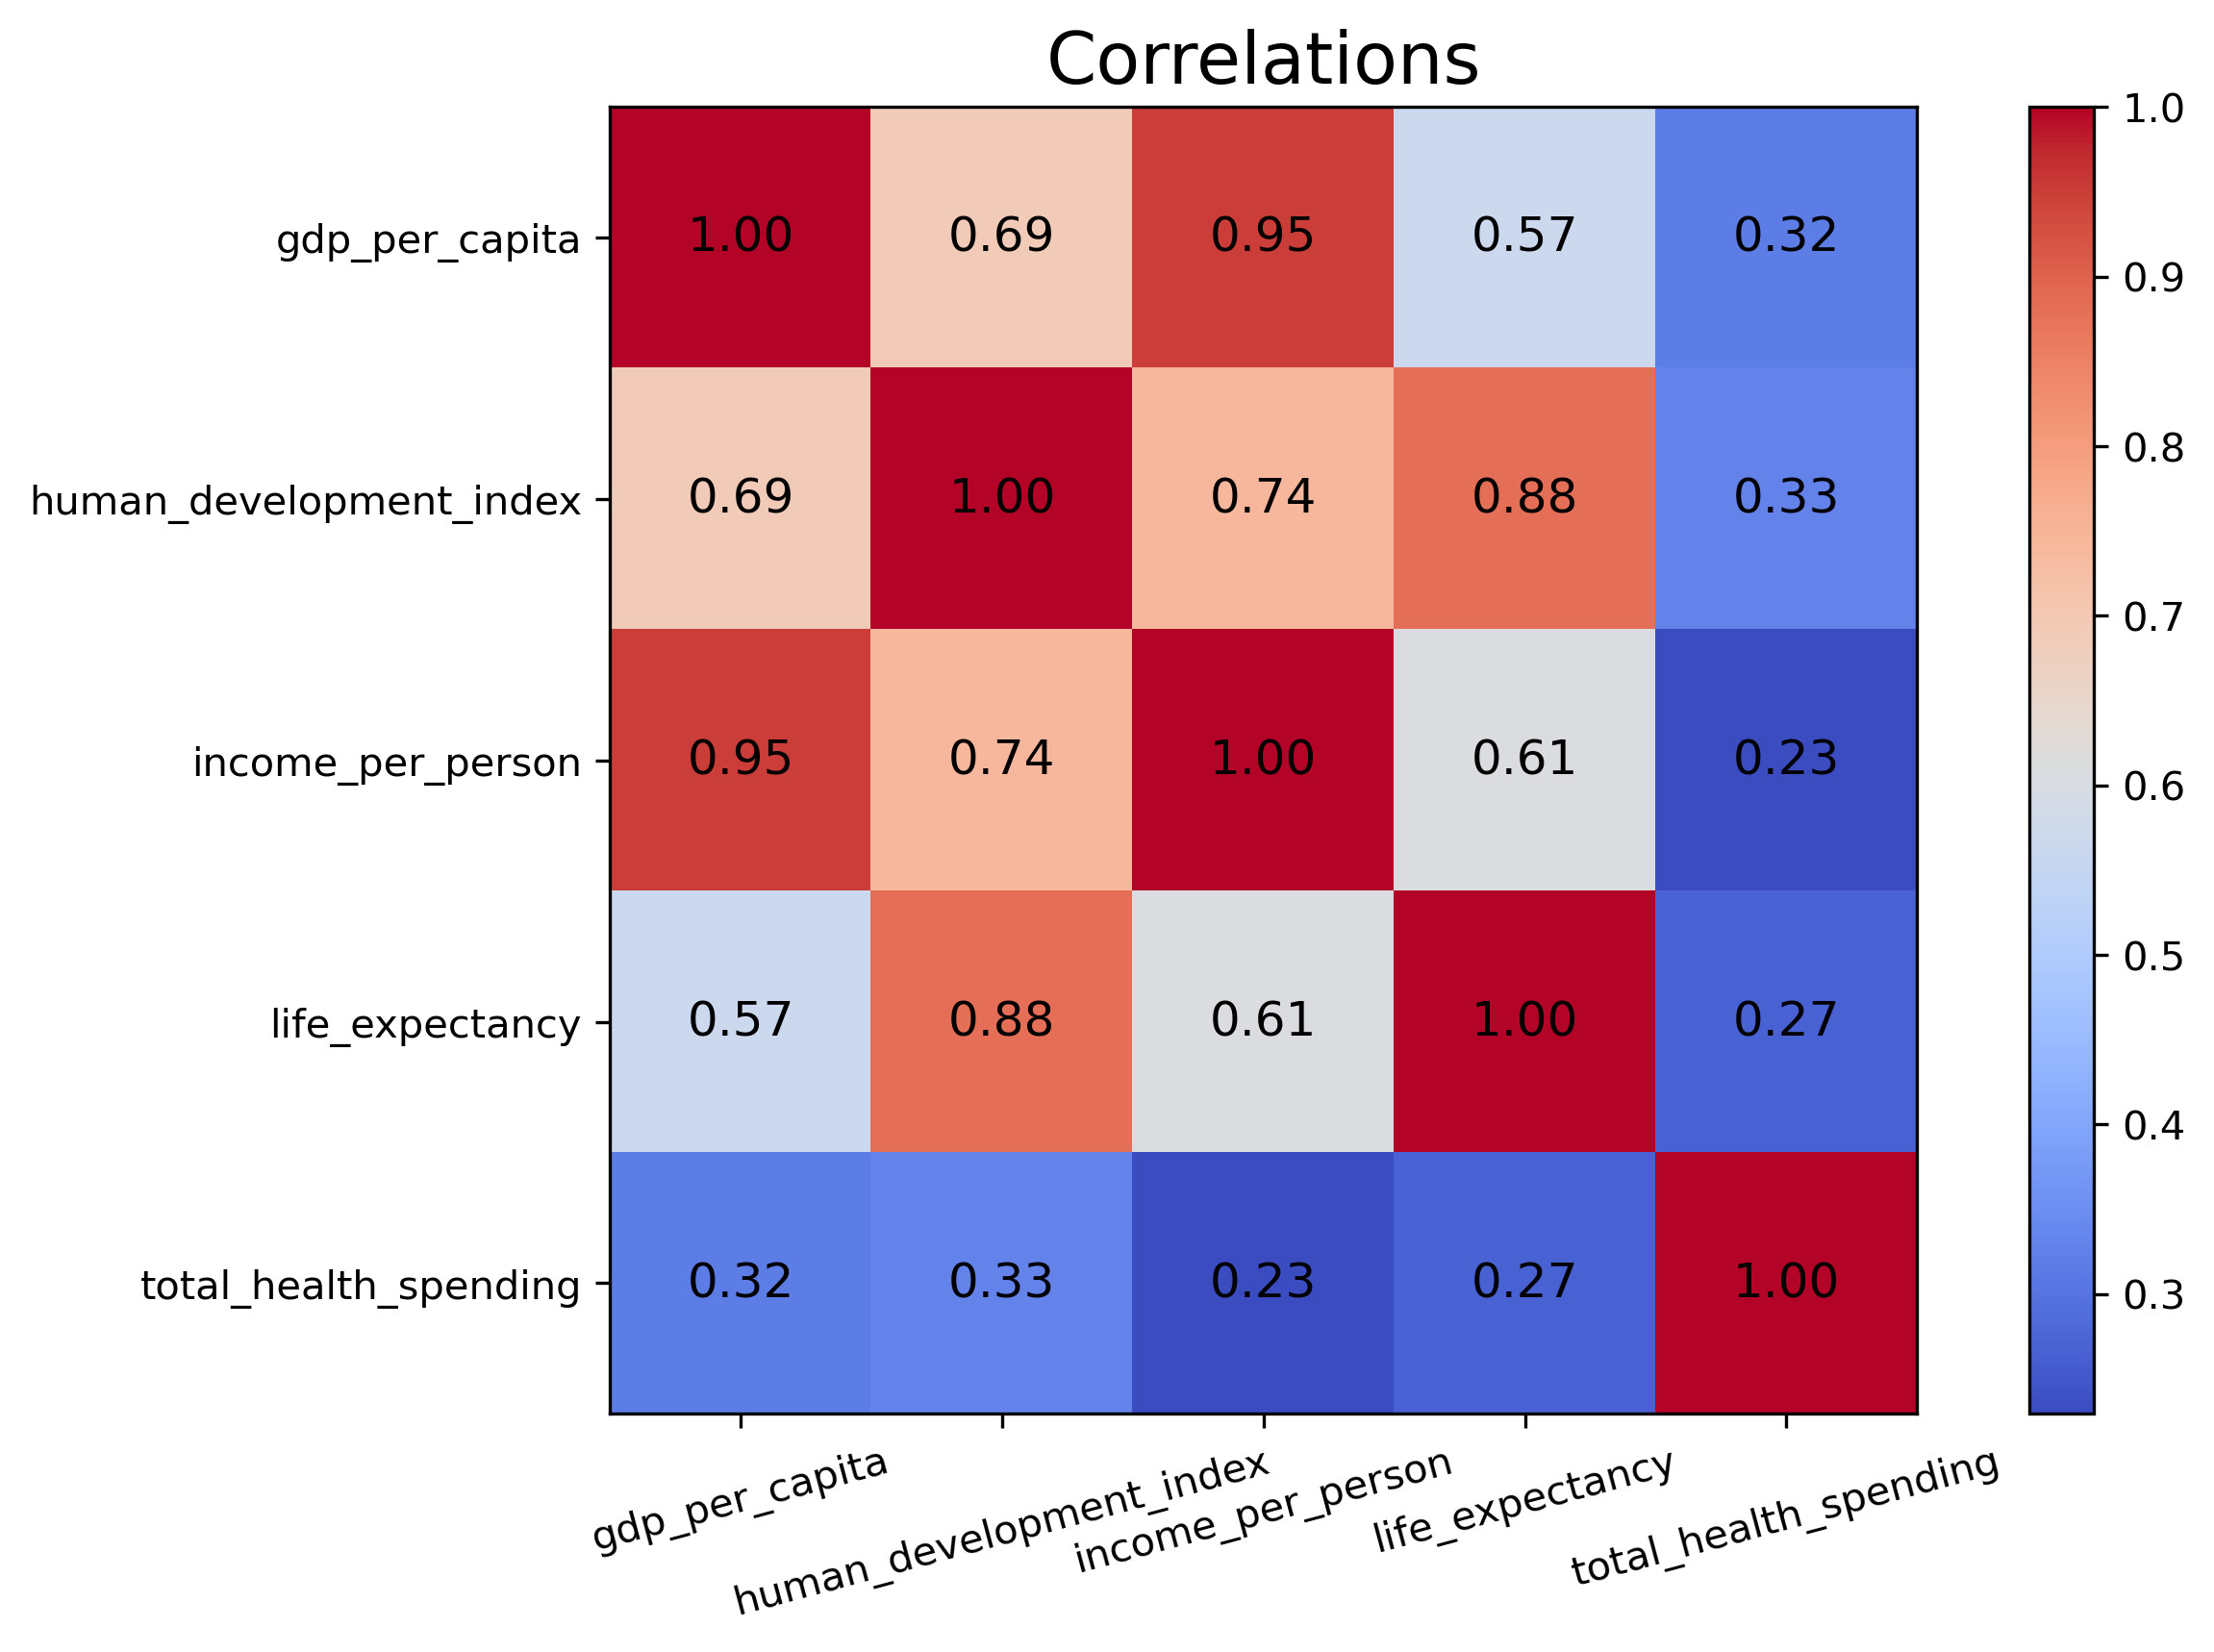

In [39]:
corr = df_overall.corr()
n_var = len(corr)

plt.figure(dpi=300,figsize = (10,6))

plt.xticks(rotation = 15)

plt.imshow(corr, cmap = 'coolwarm')

plt.xticks(range(n_var), corr.columns)
plt.yticks(range(n_var), corr.columns)

for i in range(n_var):
    for j in range (n_var):
        plt.text(i, j, '{:.2f}'.format(corr.iloc[i, j]), ha='center',va='center', color='k', fontsize = 12)

plt.colorbar()
plt.title('Correlations',fontsize=18)
plt.savefig('Correlation.png')

### 4.2 GDP Rank

In [40]:
#Top 10 GDP per capita countries in year 2018
rank_gdp = df_no_health[df_no_health['year'] == '2018'].sort_values(by='gdp_per_capita', ascending=False)
rank_gdp.head(10)

,country,year,gdp_per_capita,human_development_index,income_per_person,life_expectancy,emissions_per_person,region
2257,Luxembourg,2018,107000.0,0.913,115000.0,82.9,15.9,Europe
3644,Switzerland,2018,88000.0,0.955,70600.0,83.9,4.33,Europe
2852,Norway,2018,76000.0,0.956,64300.0,82.8,8.31,Europe
1857,Ireland,2018,72600.0,0.951,83700.0,82.0,8.09,Europe
3405,Singapore,2018,61100.0,0.936,98200.0,84.7,7.1,Asia
3141,Qatar,2018,59800.0,0.845,91000.0,76.1,38.0,Asia
214,Australia,2018,58400.0,0.943,49000.0,82.9,16.9,Oceania
1741,Iceland,2018,57700.0,0.946,56800.0,84.0,10.8,Europe
1023,Denmark,2018,56600.0,0.939,56200.0,81.1,6.06,Europe
3615,Sweden,2018,53000.0,0.943,52300.0,82.7,4.12,Europe


In [41]:
#Last 10 GDP per capita countries in year 2018
rank_gdp.tail(10)

,country,year,gdp_per_capita,human_development_index,income_per_person,life_expectancy,emissions_per_person,region
1602,Guinea-Bissau,2018,638.0,0.472,1900.0,60.3,0.181,Africa
3376,Sierra Leone,2018,630.0,0.447,1660.0,61.2,0.141,Africa
3748,Togo,2018,613.0,0.510,2060.0,64.5,0.434,Africa
2605,Mozambique,2018,603.0,0.452,1290.0,57.9,0.281,Africa
16,Afghanistan,2018,547.0,0.509,2030.0,62.7,0.254,Asia
2807,Niger,2018,514.0,0.391,1200.0,62.0,0.103,Africa
2276,Madagascar,2018,481.0,0.527,1590.0,65.1,0.163,Africa
758,Central African Republic,2018,413.0,0.395,933.0,51.5,0.0651,Africa
2305,Malawi,2018,391.0,0.478,1500.0,64.1,0.0762,Africa
652,Burundi,2018,282.0,0.431,762.0,63.4,0.0467,Africa


In [42]:
Luxembourg = df_no_health[df_no_health['country']=='Luxembourg']
Luxembourg_2018 = Luxembourg[df_no_health['year'] == '2018']
Luxembourg_2018

C:\Users\75687\AppData\Local\Temp\ipykernel_22100\2576187653.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Luxembourg_2018 = Luxembourg[df_no_health['year'] == '2018']


,country,year,gdp_per_capita,human_development_index,income_per_person,life_expectancy,emissions_per_person,region
2257,Luxembourg,2018,107000.0,0.913,115000.0,82.9,15.9,Europe


In [43]:
Burundi = df_no_health[df_no_health['country']=='Burundi']
Burundi_2018 = Burundi[df_no_health['year'] == '2018']
Burundi_2018

C:\Users\75687\AppData\Local\Temp\ipykernel_22100\1971299926.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Burundi_2018 = Burundi[df_no_health['year'] == '2018']


,country,year,gdp_per_capita,human_development_index,income_per_person,life_expectancy,emissions_per_person,region
652,Burundi,2018,282.0,0.431,762.0,63.4,0.0467,Africa


In [44]:
comparison = pd.concat([Luxembourg_2018,Burundi_2018], ignore_index=True)
comparison

,country,year,gdp_per_capita,human_development_index,income_per_person,life_expectancy,emissions_per_person,region
0,Luxembourg,2018,107000.0,0.913,115000.0,82.9,15.9,Europe
1,Burundi,2018,282.0,0.431,762.0,63.4,0.0467,Africa


Compare the Top3 and Tail 3 countries based GDP per capita

In [45]:
comparison_1 = pd.concat([rank_gdp.head(2),rank_gdp.tail(2)], ignore_index=True)
comparison_1

,country,year,gdp_per_capita,human_development_index,income_per_person,life_expectancy,emissions_per_person,region
0,Luxembourg,2018,107000.0,0.913,115000.0,82.9,15.9,Europe
1,Switzerland,2018,88000.0,0.955,70600.0,83.9,4.33,Europe
2,Malawi,2018,391.0,0.478,1500.0,64.1,0.0762,Africa
3,Burundi,2018,282.0,0.431,762.0,63.4,0.0467,Africa


### 4.3 Histogram

Histogram could present the distribution of key metrics in most countries in the world in these decades.

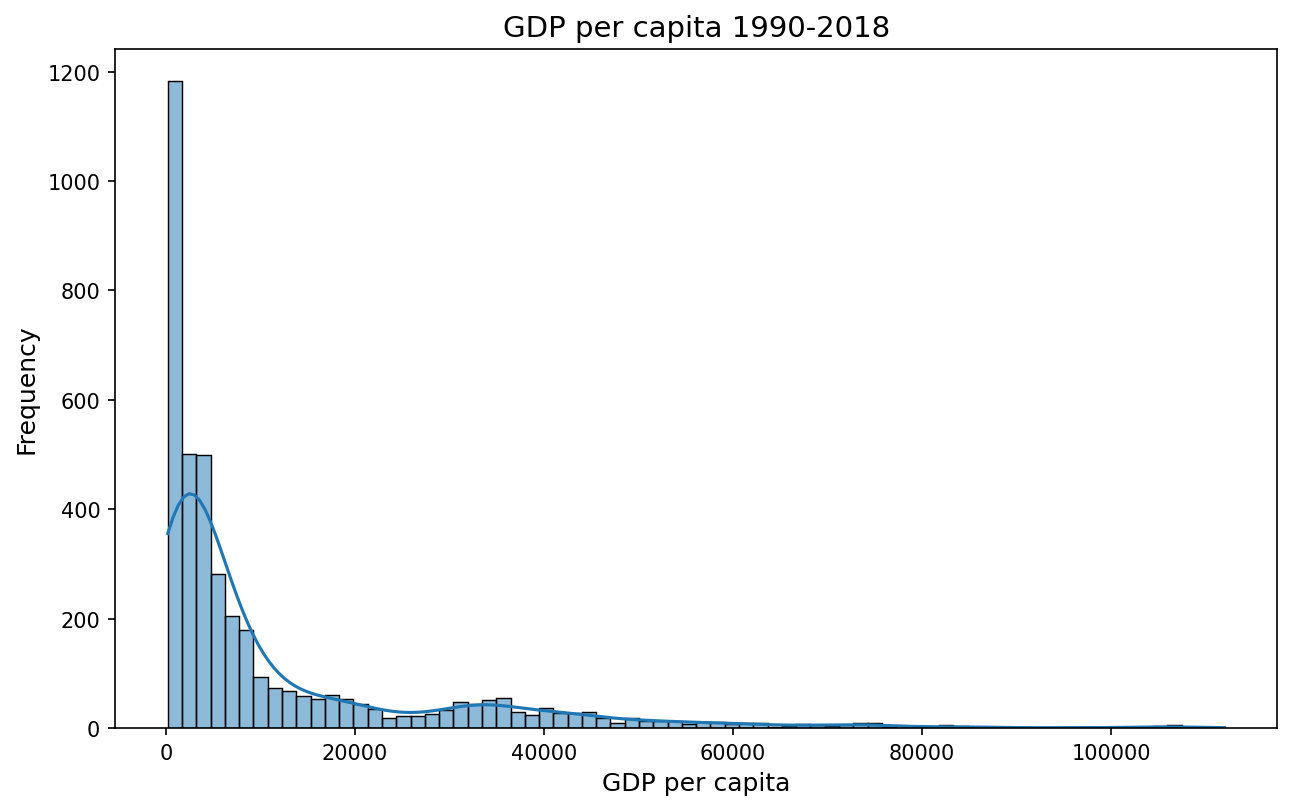

In [46]:
plt.figure(dpi=150, figsize=(10,6))
sns.histplot(data=df_no_health['gdp_per_capita'],kde=True)

plt.xlabel('GDP per capita', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('GDP per capita 1990-2018',fontsize=14)

plt.savefig('GDP Hist.png')

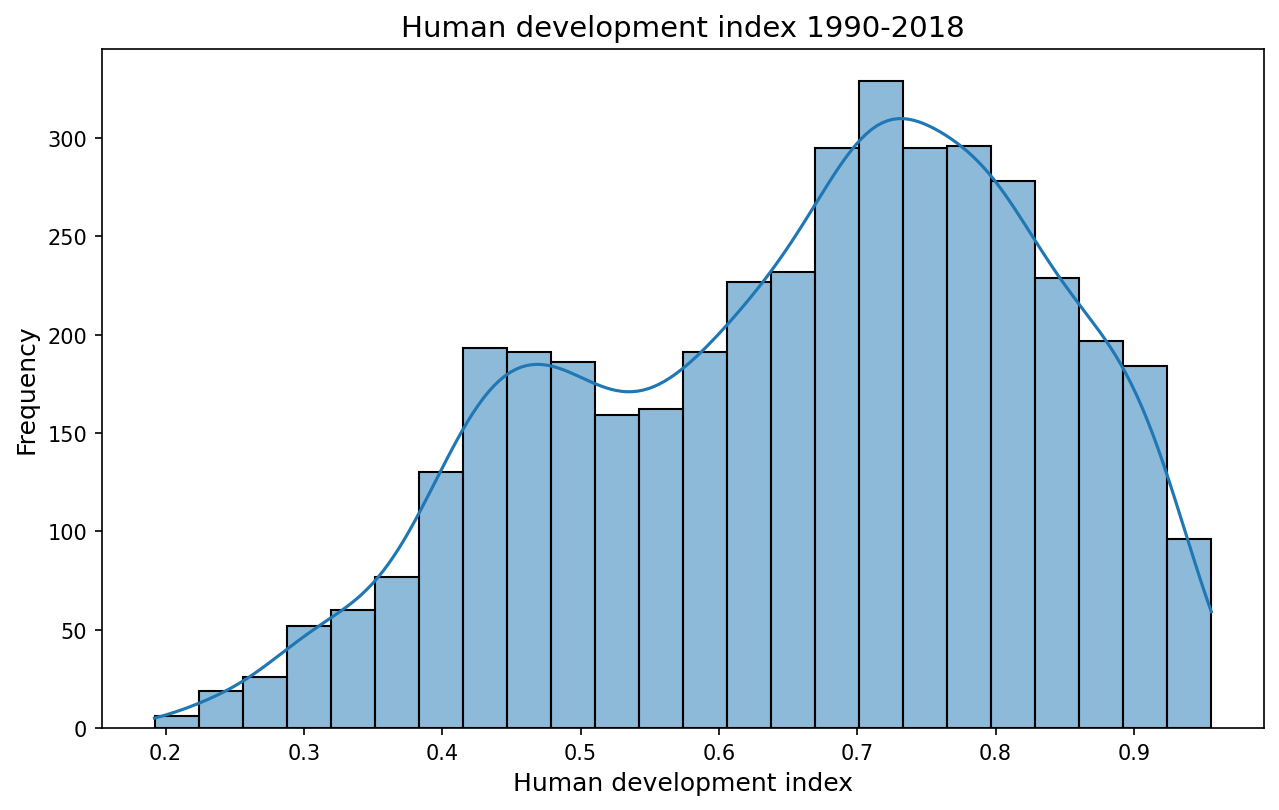

In [47]:
plt.figure(dpi=150, figsize=(10,6))
sns.histplot(data=df_no_health['human_development_index'],kde=True)

plt.xlabel('Human development index', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Human development index 1990-2018',fontsize=14)

plt.savefig('HDI Hist.png')

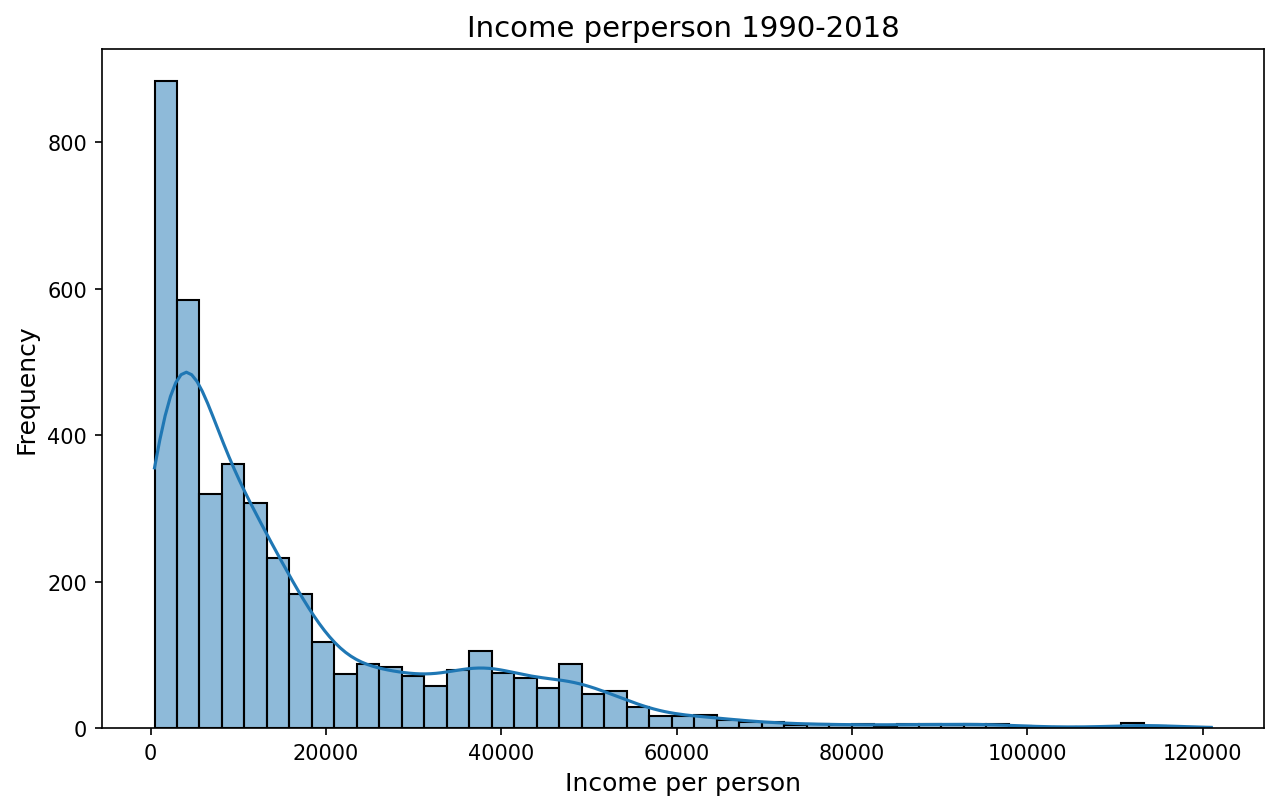

In [48]:
plt.figure(dpi=150, figsize=(10,6))

sns.histplot(data=df_no_health['income_per_person'],kde=True)

plt.xlabel('Income per person', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Income perperson 1990-2018',fontsize=14)

plt.savefig('Income Hist.png')

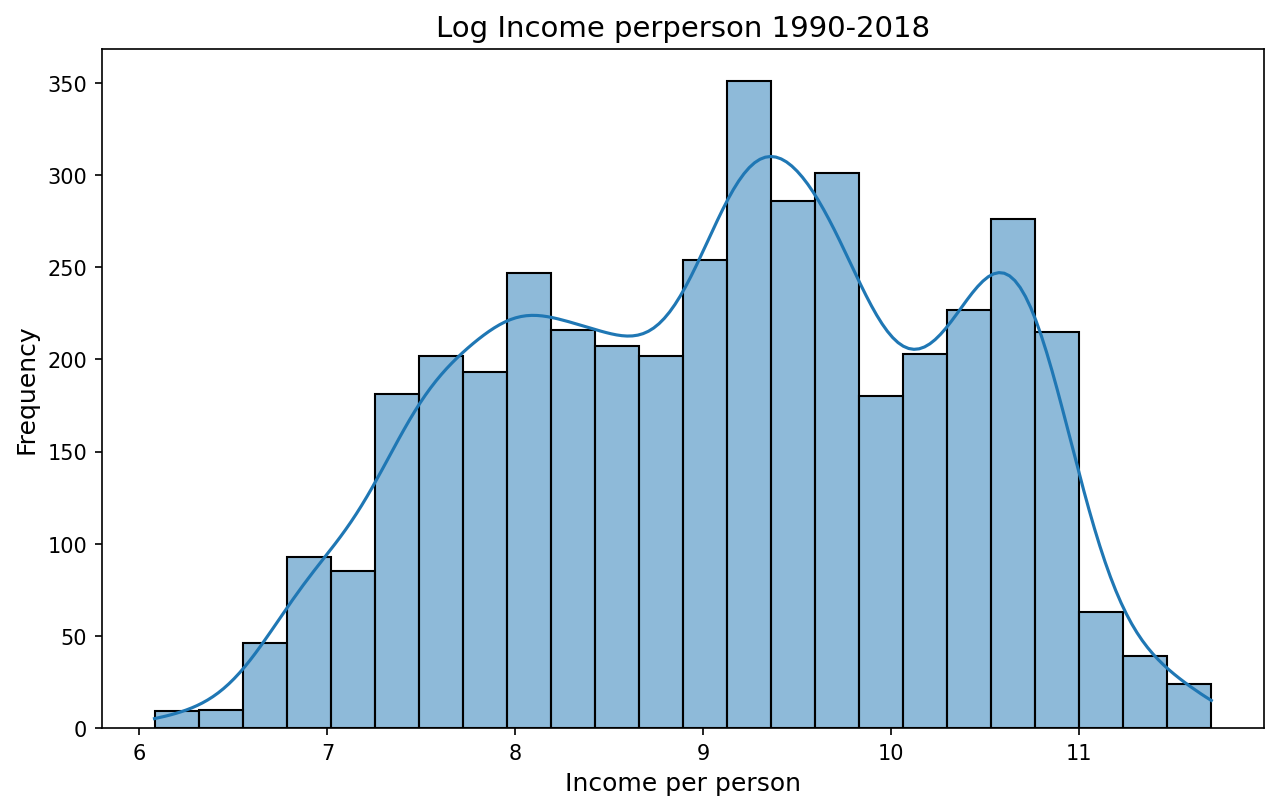

In [49]:
df_no_health['log_income'] = np.log(df_no_health['income_per_person'])

plt.figure(dpi=150, figsize=(10,6))

sns.histplot(data=df_no_health['log_income'],kde=True)
plt.xlabel('Income per person', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Log Income perperson 1990-2018',fontsize=14)

plt.savefig('Log Income Hist.png')

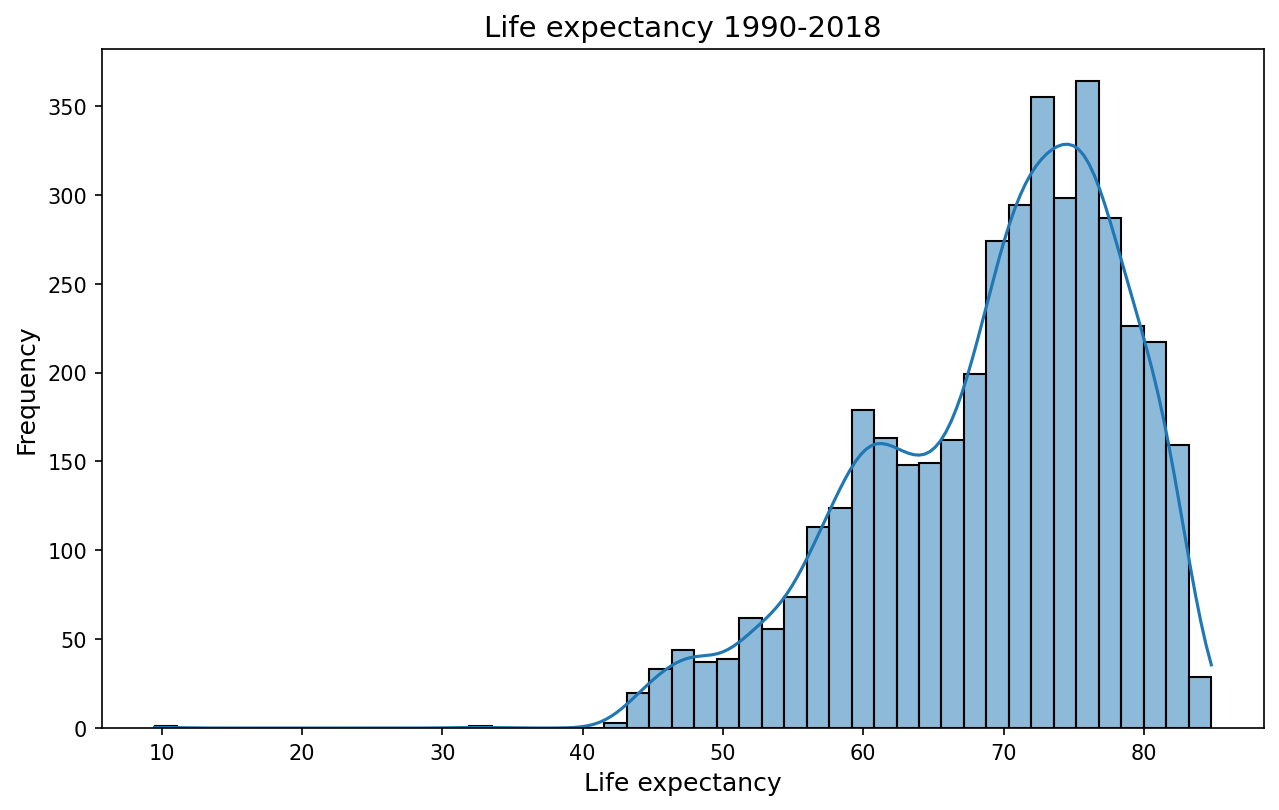

In [50]:
plt.figure(dpi=150, figsize=(10,6))
sns.histplot(data=df_no_health['life_expectancy'], kde=True)

plt.xlabel('Life expectancy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Life expectancy 1990-2018',fontsize=14)

plt.savefig('Life expectancy Hist.png')

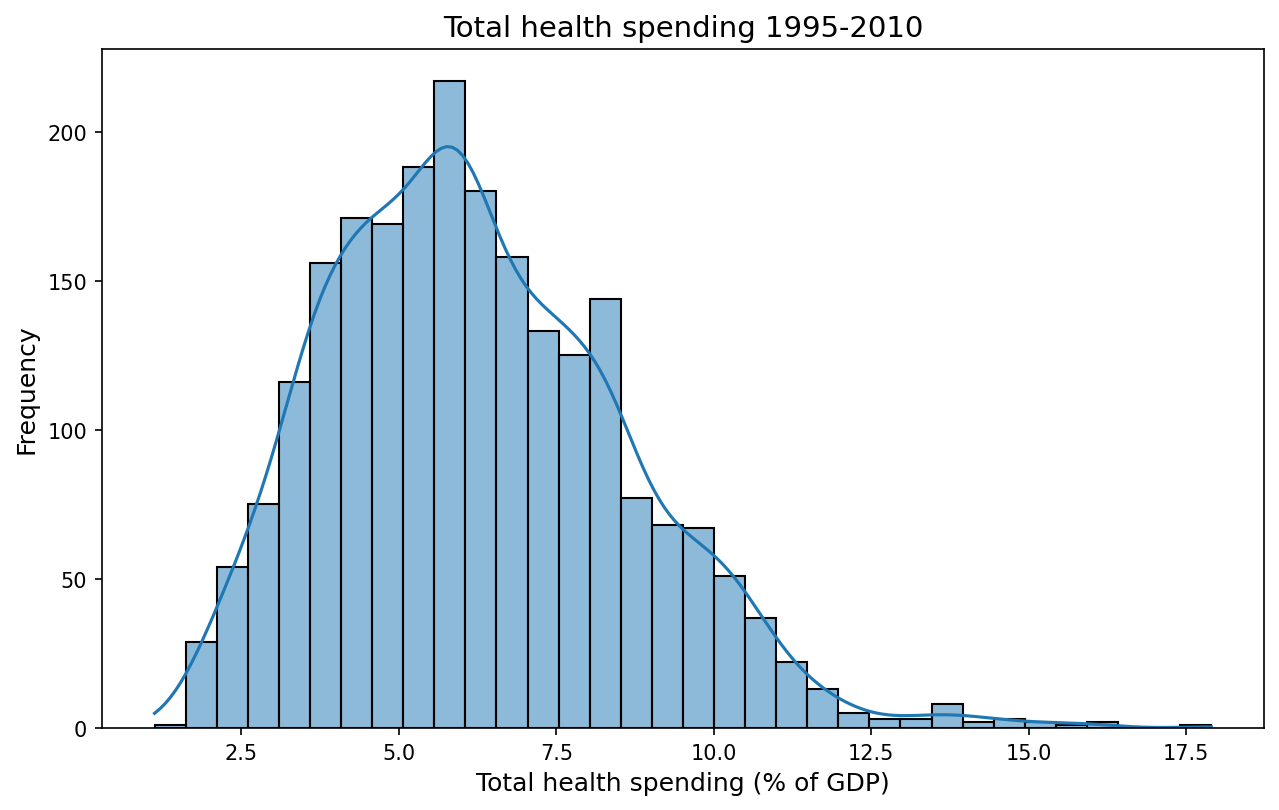

In [51]:
plt.figure(dpi=150, figsize=(10,6))
sns.histplot(data=df_overall['total_health_spending'],kde=True)

plt.xlabel('Total health spending (% of GDP)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Total health spending 1995-2010',fontsize=14)

plt.savefig('Total health spending Hist.png')

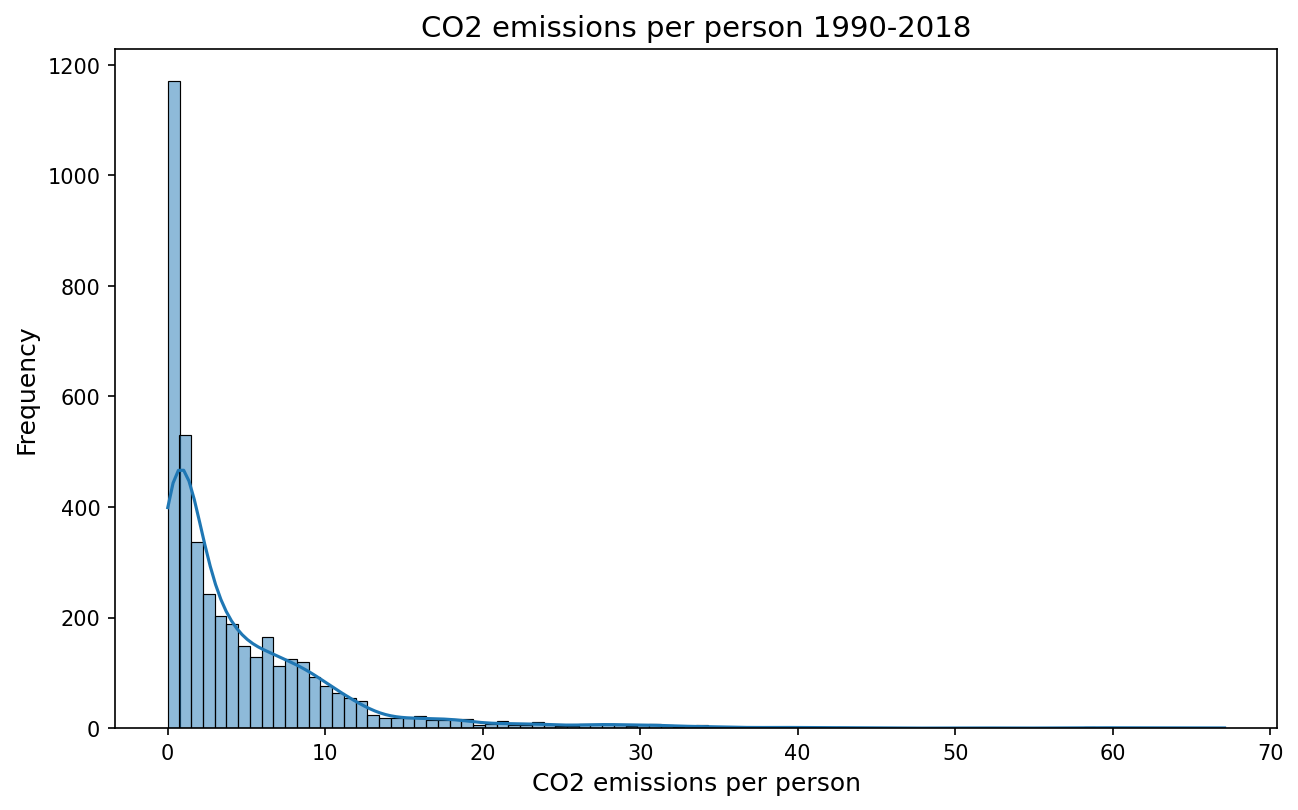

In [52]:
plt.figure(dpi=150, figsize=(10,6))
sns.histplot(data=df_no_health['emissions_per_person'],kde=True)

plt.xlabel('CO2 emissions per person', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('CO2 emissions per person 1990-2018',fontsize=14)

plt.savefig('CO2 emissions per person Hist.png')

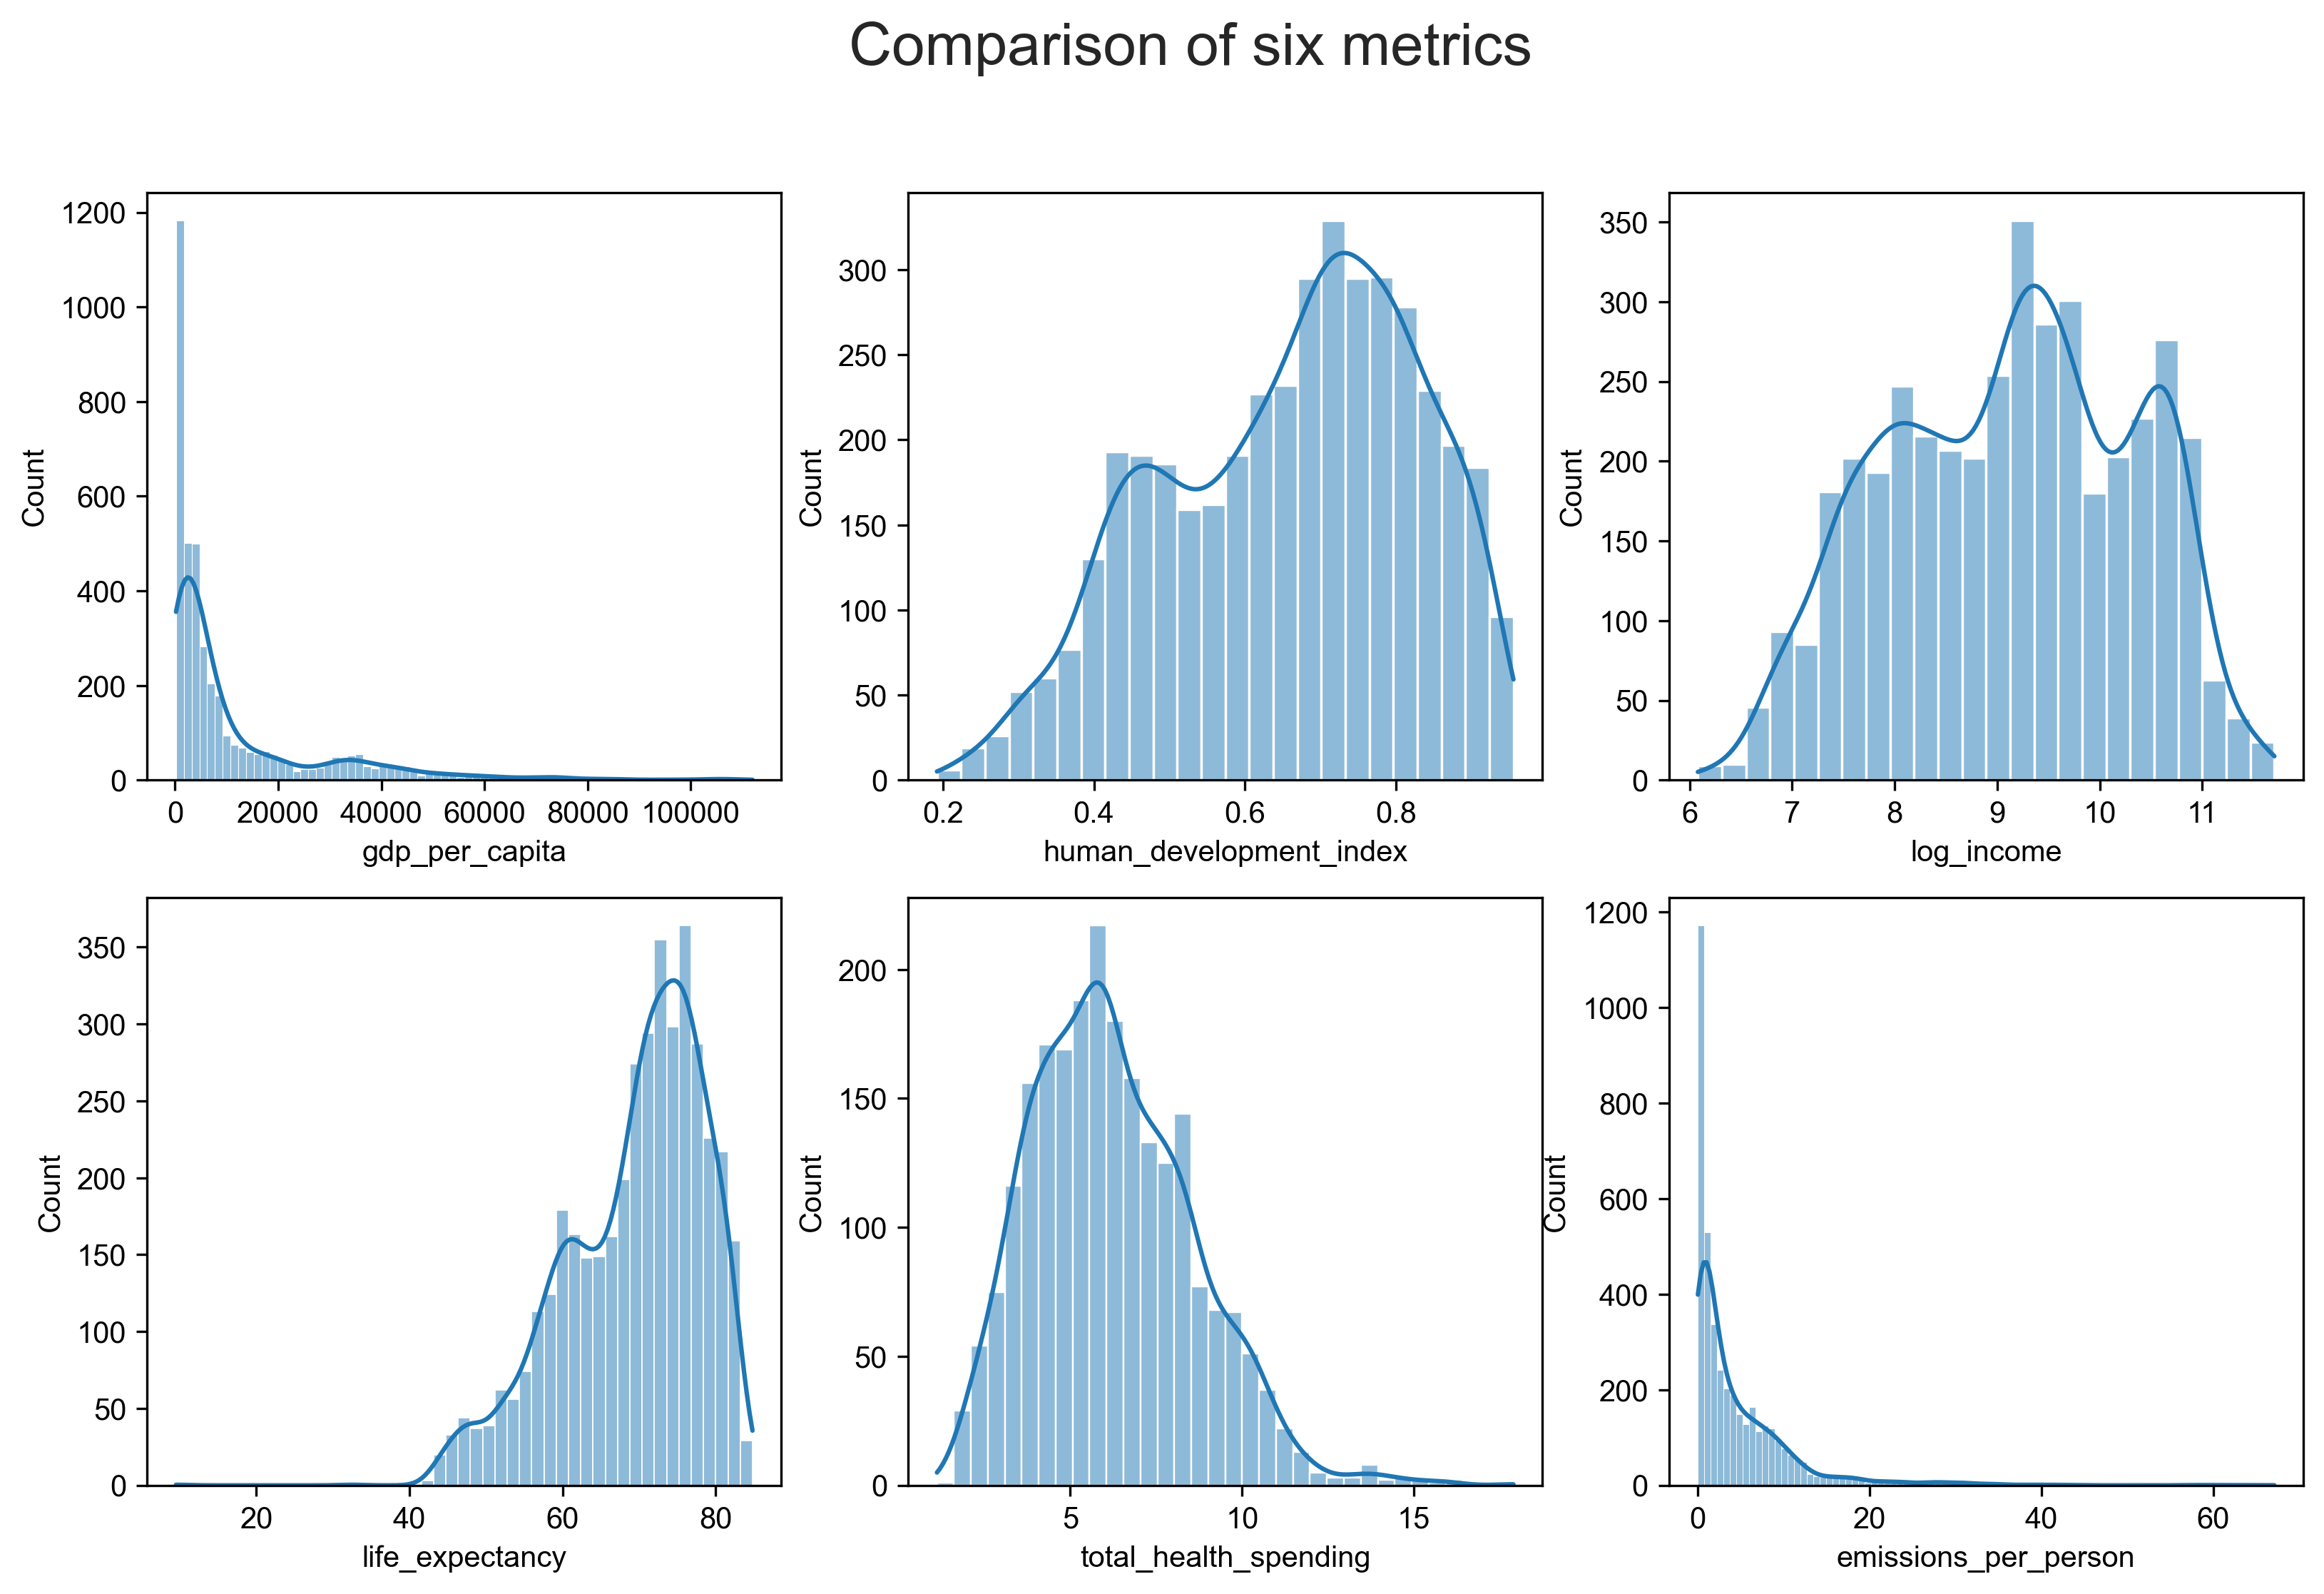

In [53]:
fig,axs=plt.subplots(2,3,figsize=(13,8),dpi=300)

sns.set_style('dark')
sns.histplot(data=df_no_health,x="gdp_per_capita",kde=True,ax=axs[0,0])
sns.histplot(data=df_no_health,x="human_development_index",kde=True,ax=axs[0,1])
sns.histplot(data=df_no_health,x="log_income",kde=True,ax=axs[0,2])
sns.histplot(data=df_no_health,x="life_expectancy",kde=True,ax=axs[1,0])
sns.histplot(data=df_overall,x="total_health_spending",kde=True,ax=axs[1,1])
sns.histplot(data=df_no_health,x="emissions_per_person",kde=True,ax=axs[1,2])

plt.suptitle('Comparison of six metrics',fontsize=20)
plt.savefig('Six Metrics.png')

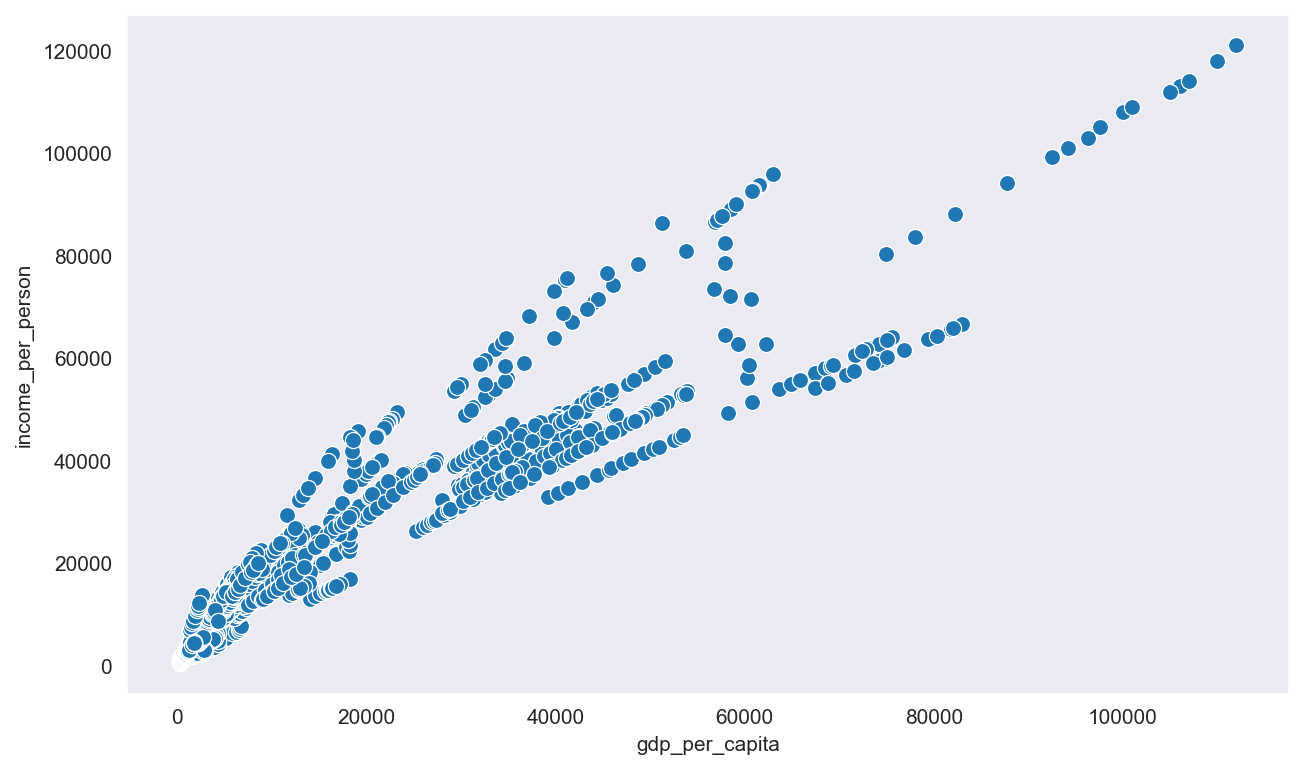

In [54]:
plt.figure(dpi=150, figsize=(10,6))
sns.scatterplot(x=df_overall['gdp_per_capita'],y=df_overall["income_per_person"], s=60, markers=["o","x"])
plt.savefig('gdp & income.png')

In [55]:
country_list = list(df_no_health['country'].unique())
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan

In [56]:
Brazil = df_no_health[df_no_health['country']=='Brazil']
France = df_no_health[df_no_health['country']=='France']
Canada = df_no_health[df_no_health['country']=='Canada']
China = df_no_health[df_no_health['country']=='China']
South_Africa = df_no_health[df_no_health['country']=='South Africa']
Australia = df_no_health[df_no_health['country']=='Australia']

In [57]:
frames = [Brazil,France,Canada,China,South_Africa,Australia]
df_six_countries=pd.concat(frames)
df_six_countries

,country,year,gdp_per_capita,human_development_index,income_per_person,life_expectancy,emissions_per_person,region,log_income
547,Brazil,1990,6160.0,0.613,10500.0,67.3,1.39,Americas,9.259131
548,Brazil,1991,6110.0,0.621,10400.0,67.9,1.43,Americas,9.249561
549,Brazil,1992,5970.0,0.627,10200.0,68.3,1.42,Americas,9.230143
550,Brazil,1993,6170.0,0.635,10500.0,68.4,1.46,Americas,9.259131
551,Brazil,1994,6420.0,0.642,11000.0,68.8,1.5,Americas,9.305651
...,...,...,...,...,...,...,...,...,...
210,Australia,2014,56300.0,0.933,47200.0,82.7,16.7,Oceania,10.762149
211,Australia,2015,56700.0,0.938,47600.0,82.7,16.8,Oceania,10.770588
212,Australia,2016,57400.0,0.939,48100.0,83.0,17.0,Oceania,10.781037
213,Australia,2017,57700.0,0.941,48400.0,83.0,17.0,Oceania,10.787255


In [58]:
China_gdp_growth_rate = df_no_health[df_no_health['country']=='China']['gdp_per_capita'].pct_change().round(6)
China_gdp_growth_rate
#reference: https://www.geeksforgeeks.org/python-pandas-dataframe-pct_change/

807         NaN
808    0.077348
809    0.128205
810    0.127273
811    0.112903
812    0.101449
813    0.085526
814    0.084848
815    0.067039
816    0.068063
817    0.073529
818    0.077626
819    0.084746
820    0.093750
821    0.092857
822    0.107843
823    0.120944
824    0.136842
825    0.090278
826    0.089172
827    0.101365
828    0.088496
829    0.071545
830    0.071320
831    0.066572
832    0.065073
833    0.062344
834    0.062207
835    0.062983
Name: gdp_per_capita, dtype: float64

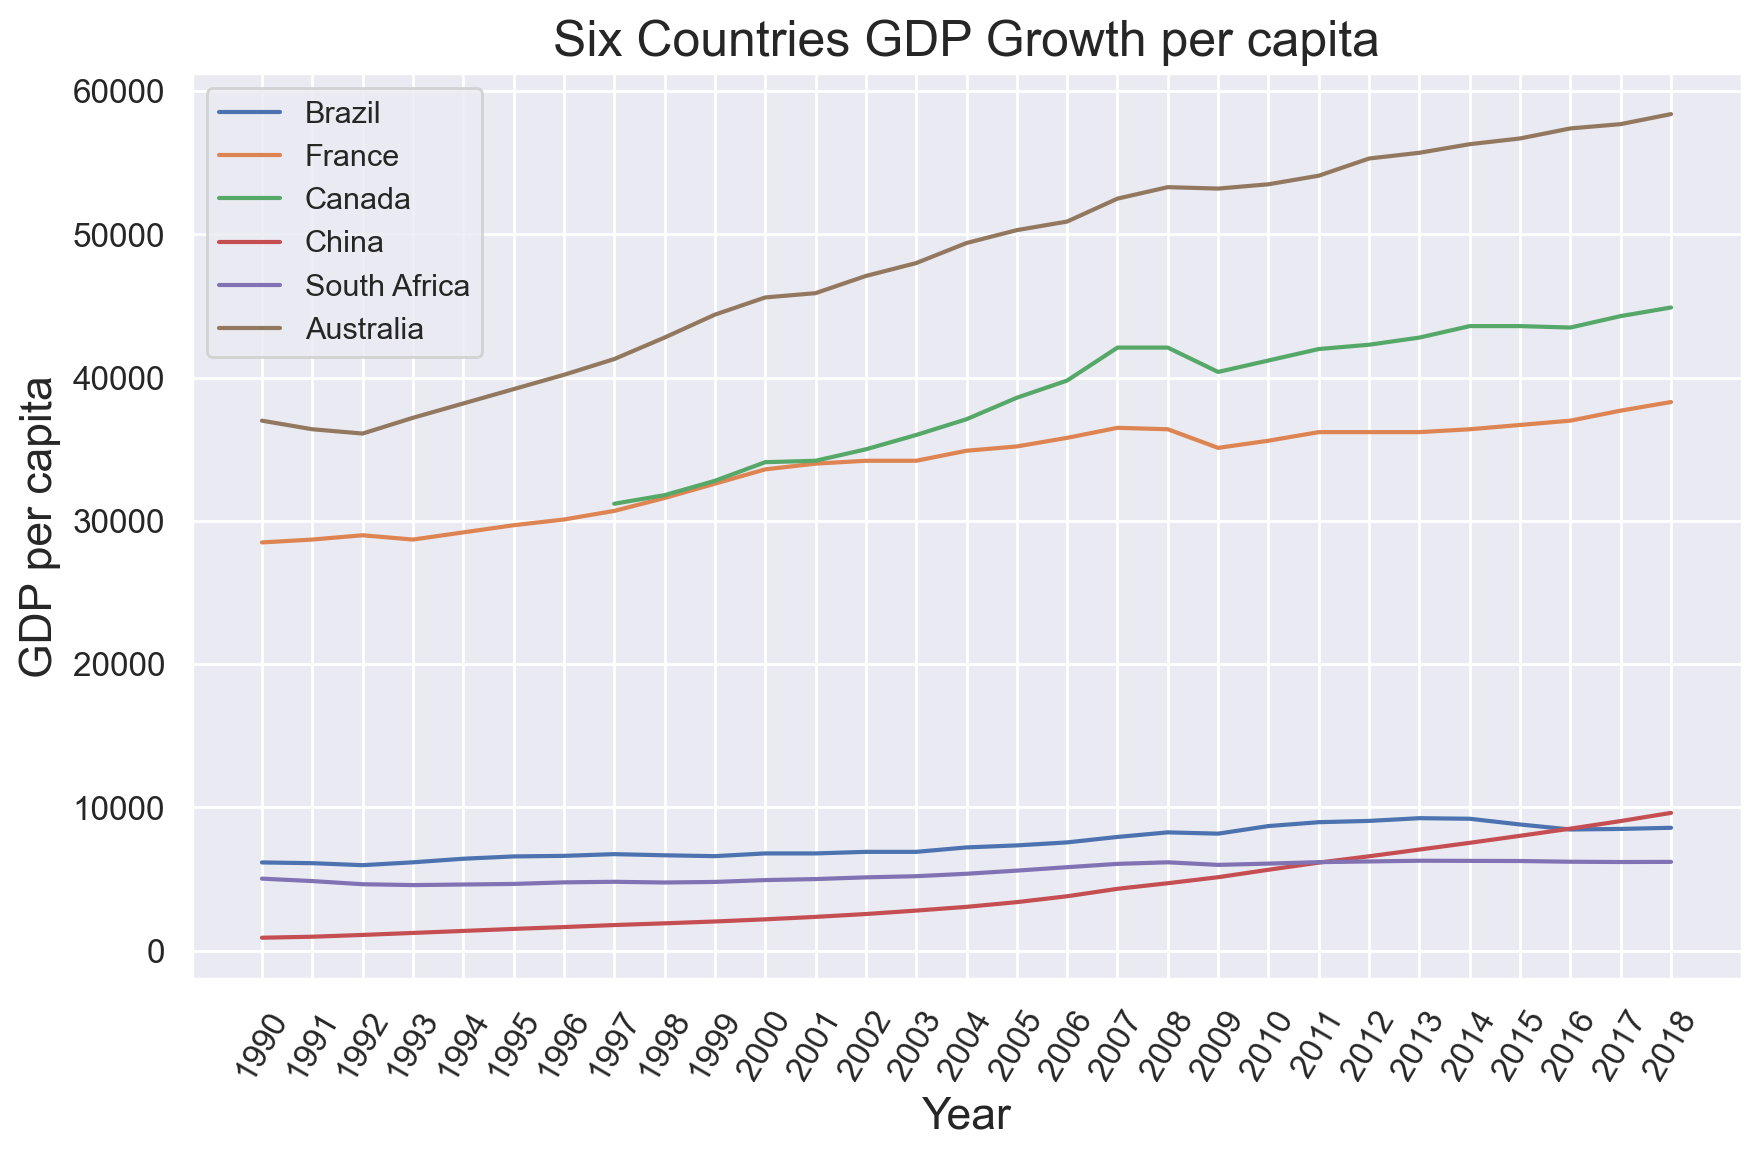

In [59]:
plt.figure(dpi=200, figsize=(10,6))

sns.set(style="darkgrid")
sns.lineplot(data=df_six_countries, x="year", y="gdp_per_capita", hue='country')

plt.xlabel('Year', fontsize=16)
plt.ylabel('GDP per capita', fontsize=16)

plt.title('Six Countries GDP Growth per capita', fontsize=18)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.savefig('Six Countries GDP Growth per capita.png')

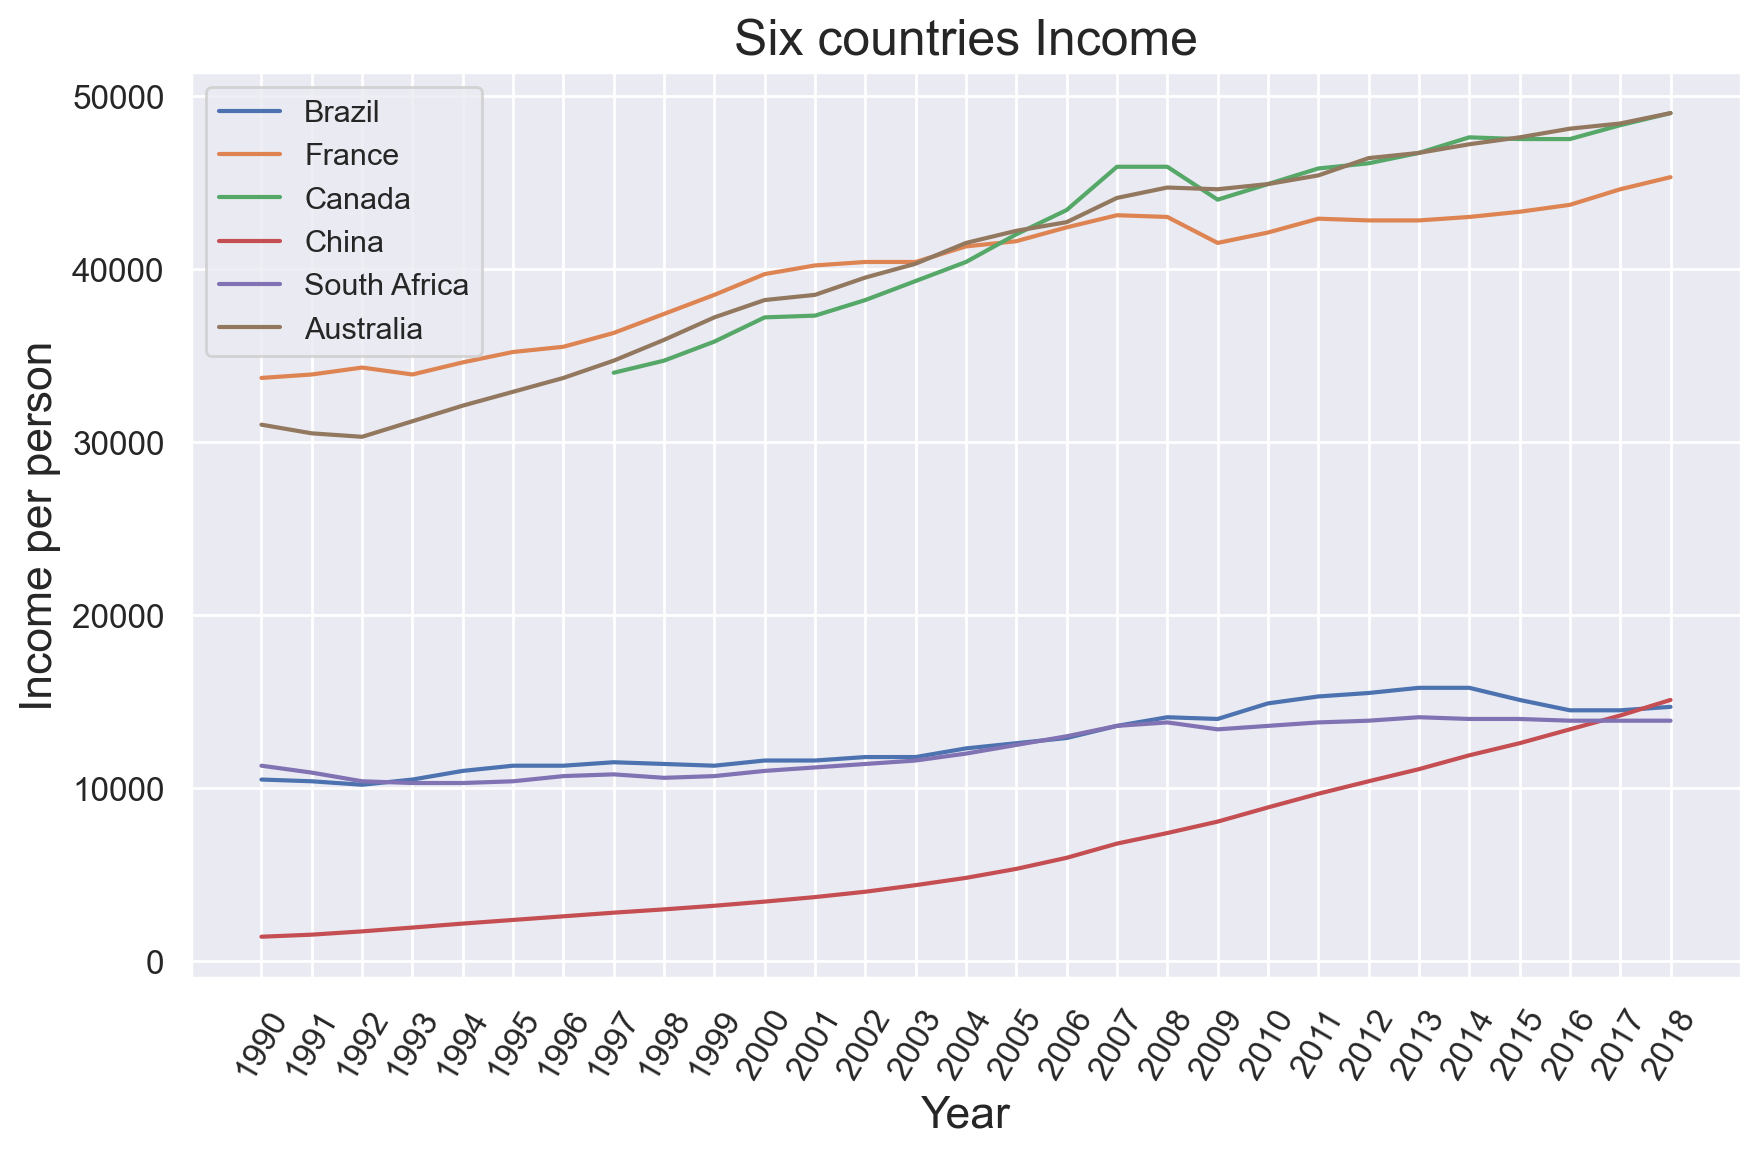

In [60]:
plt.figure(dpi=200, figsize=(10,6))
sns.set(style="darkgrid")
sns.lineplot(data=df_six_countries, x="year", y="income_per_person", color = 'green', hue='country')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Income per person', fontsize=16)

plt.title('Six countries Income', fontsize=18)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.savefig('Six countris income growth.png')

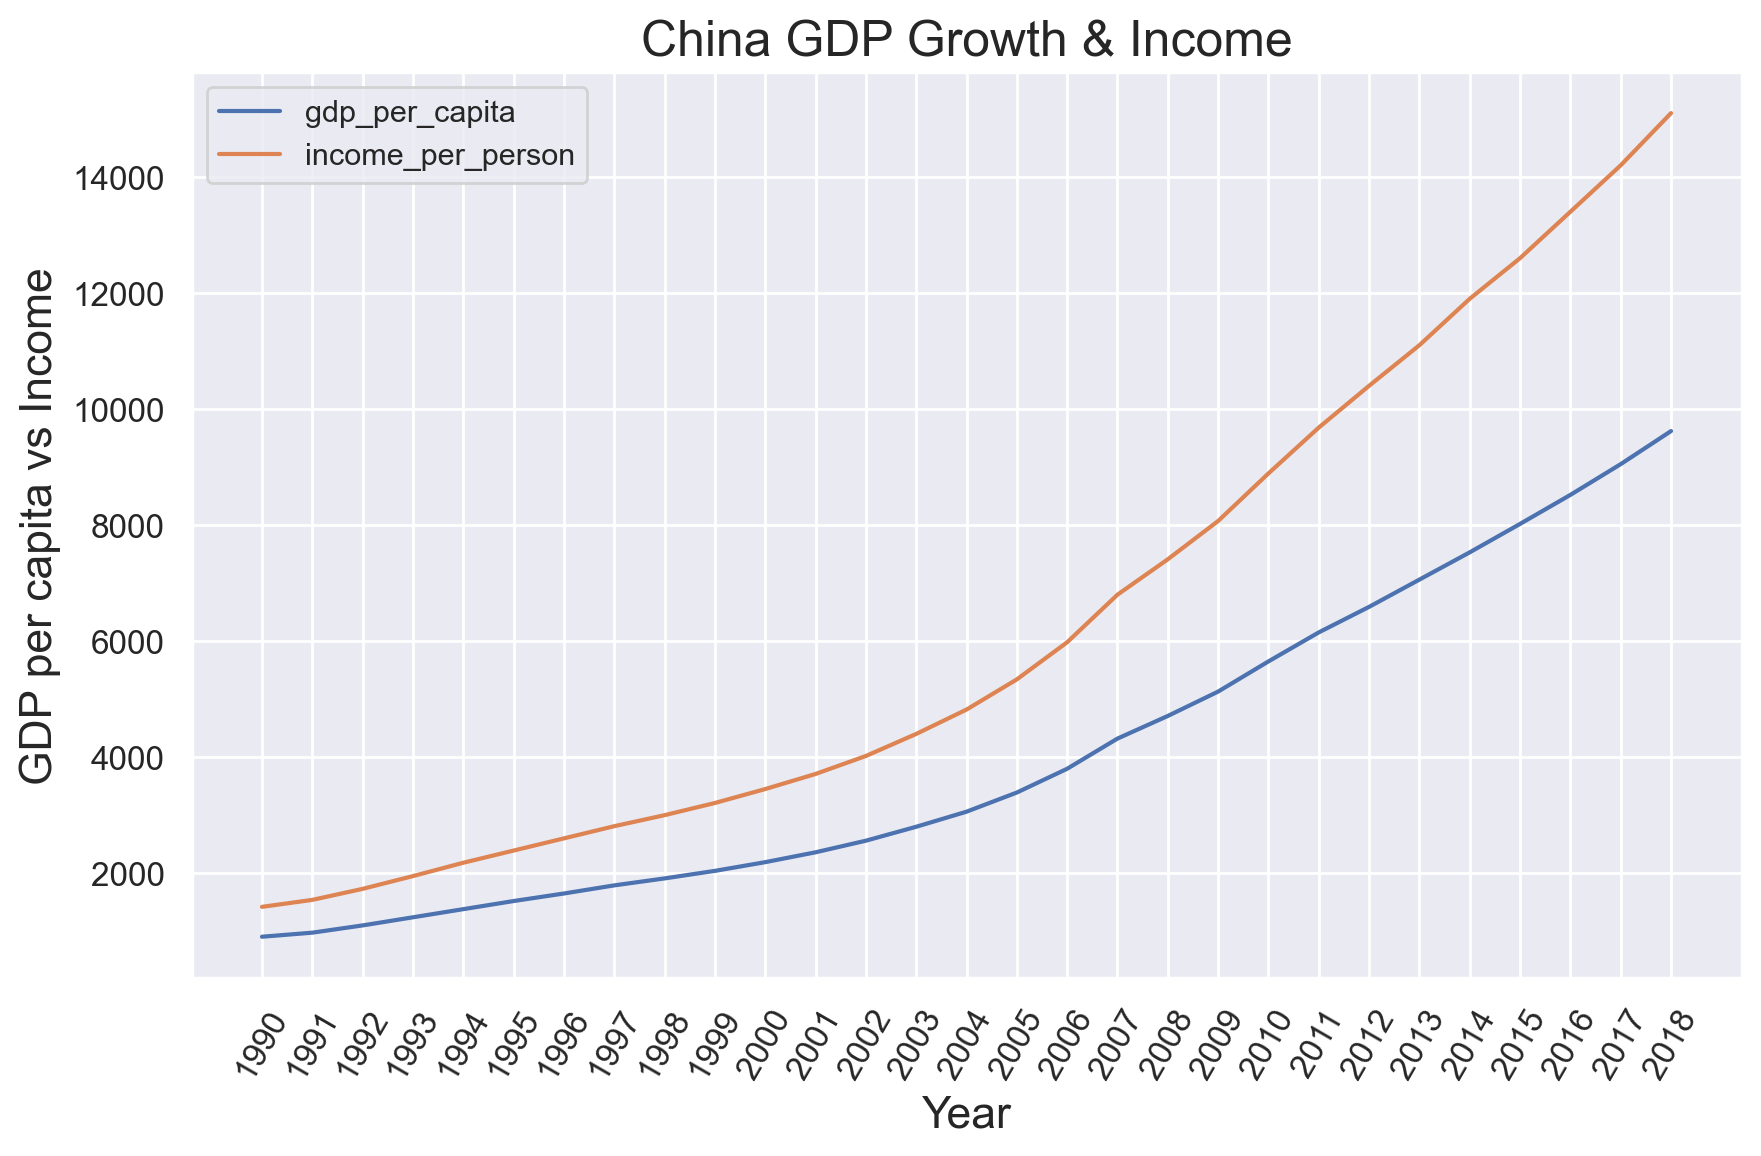

In [61]:
plt.figure(dpi=200, figsize=(10,6))
sns.set(style="darkgrid")
sns.lineplot(data=China, x="year", y="gdp_per_capita", label = 'gdp_per_capita')
sns.lineplot(data=China, x="year", y="income_per_person", label = 'income_per_person')

plt.xlabel('Year', fontsize=16)
plt.ylabel('GDP per capita vs Income', fontsize=16)

plt.title('China GDP Growth & Income', fontsize=18)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.savefig('China GDP Growth & Income.png')

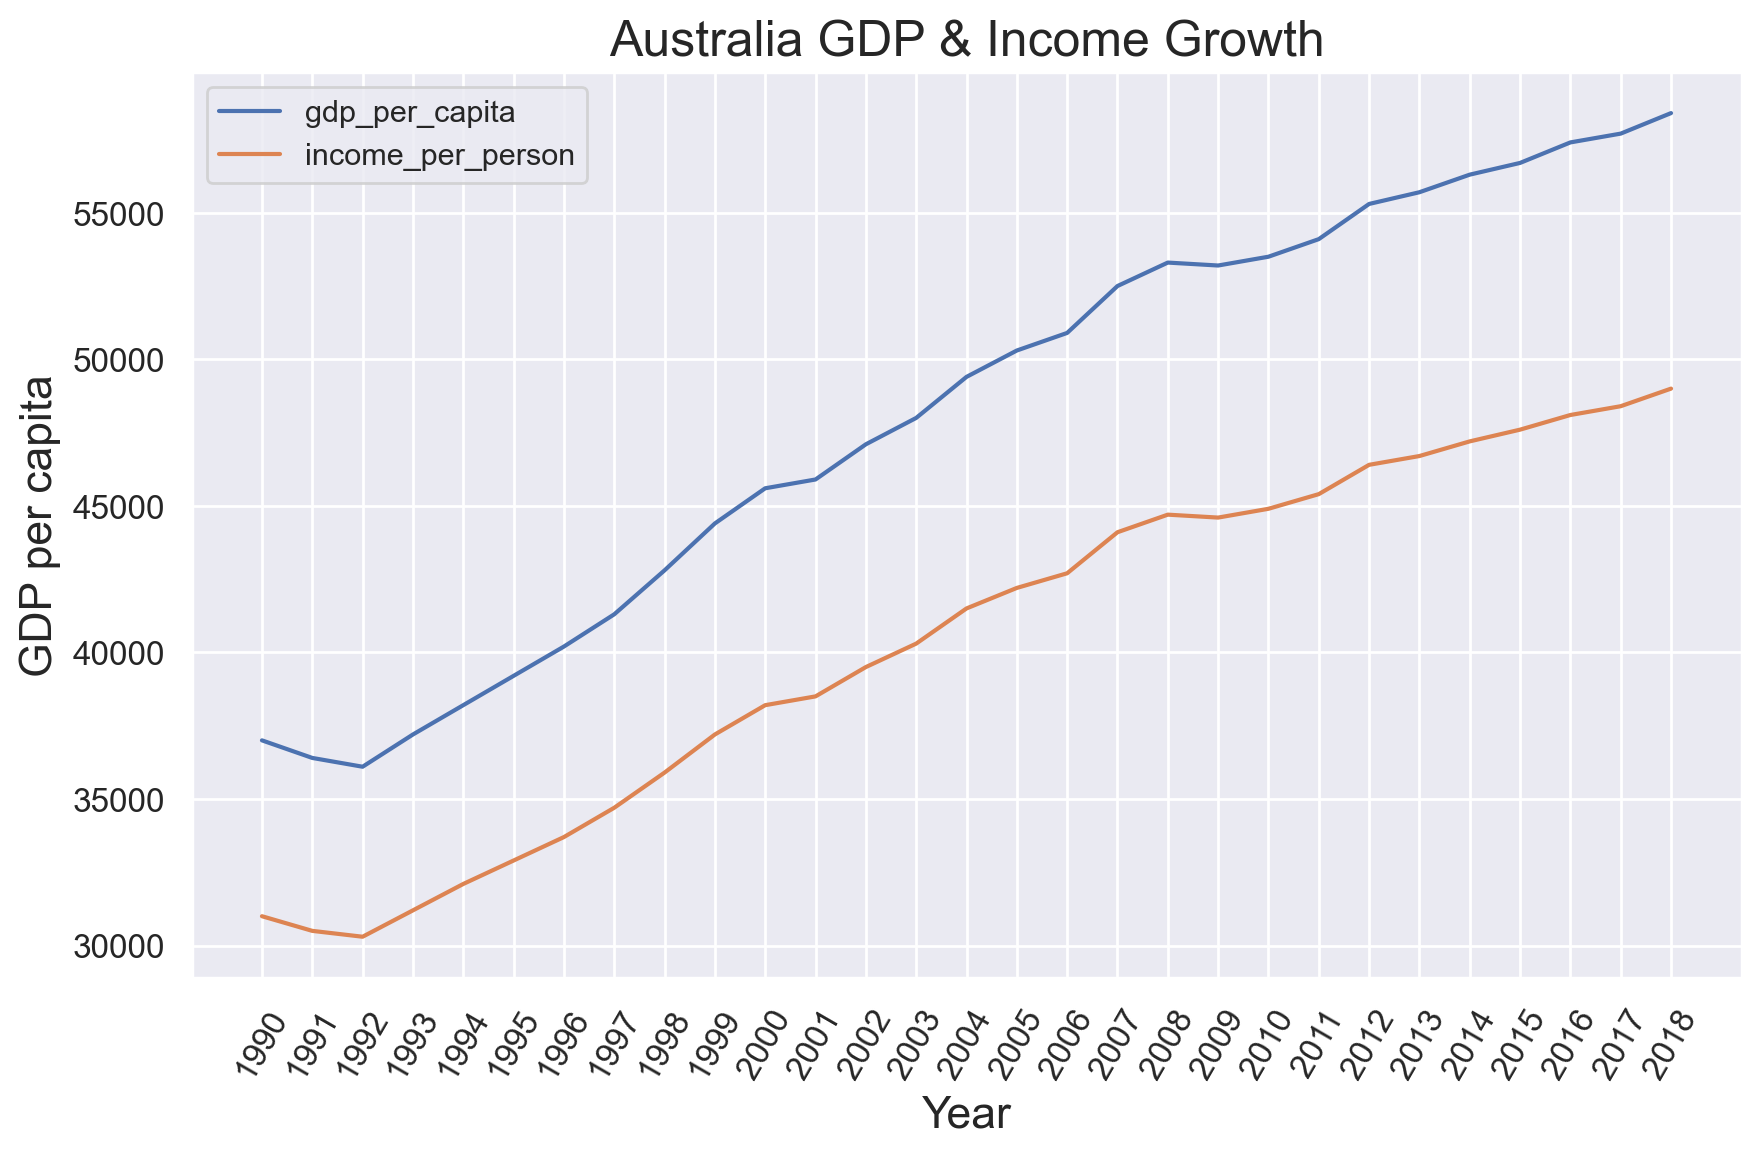

In [62]:
plt.figure(dpi=200, figsize=(10,6))
sns.set(style="darkgrid")
sns.lineplot(data=Australia, x="year", y="gdp_per_capita",label = 'gdp_per_capita')
sns.lineplot(data=Australia, x="year", y="income_per_person", label = 'income_per_person')

plt.xlabel('Year', fontsize=16)
plt.ylabel('GDP per capita', fontsize=16)

plt.title('Australia GDP & Income Growth', fontsize=18)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Australia GDP & Income Growth.png')

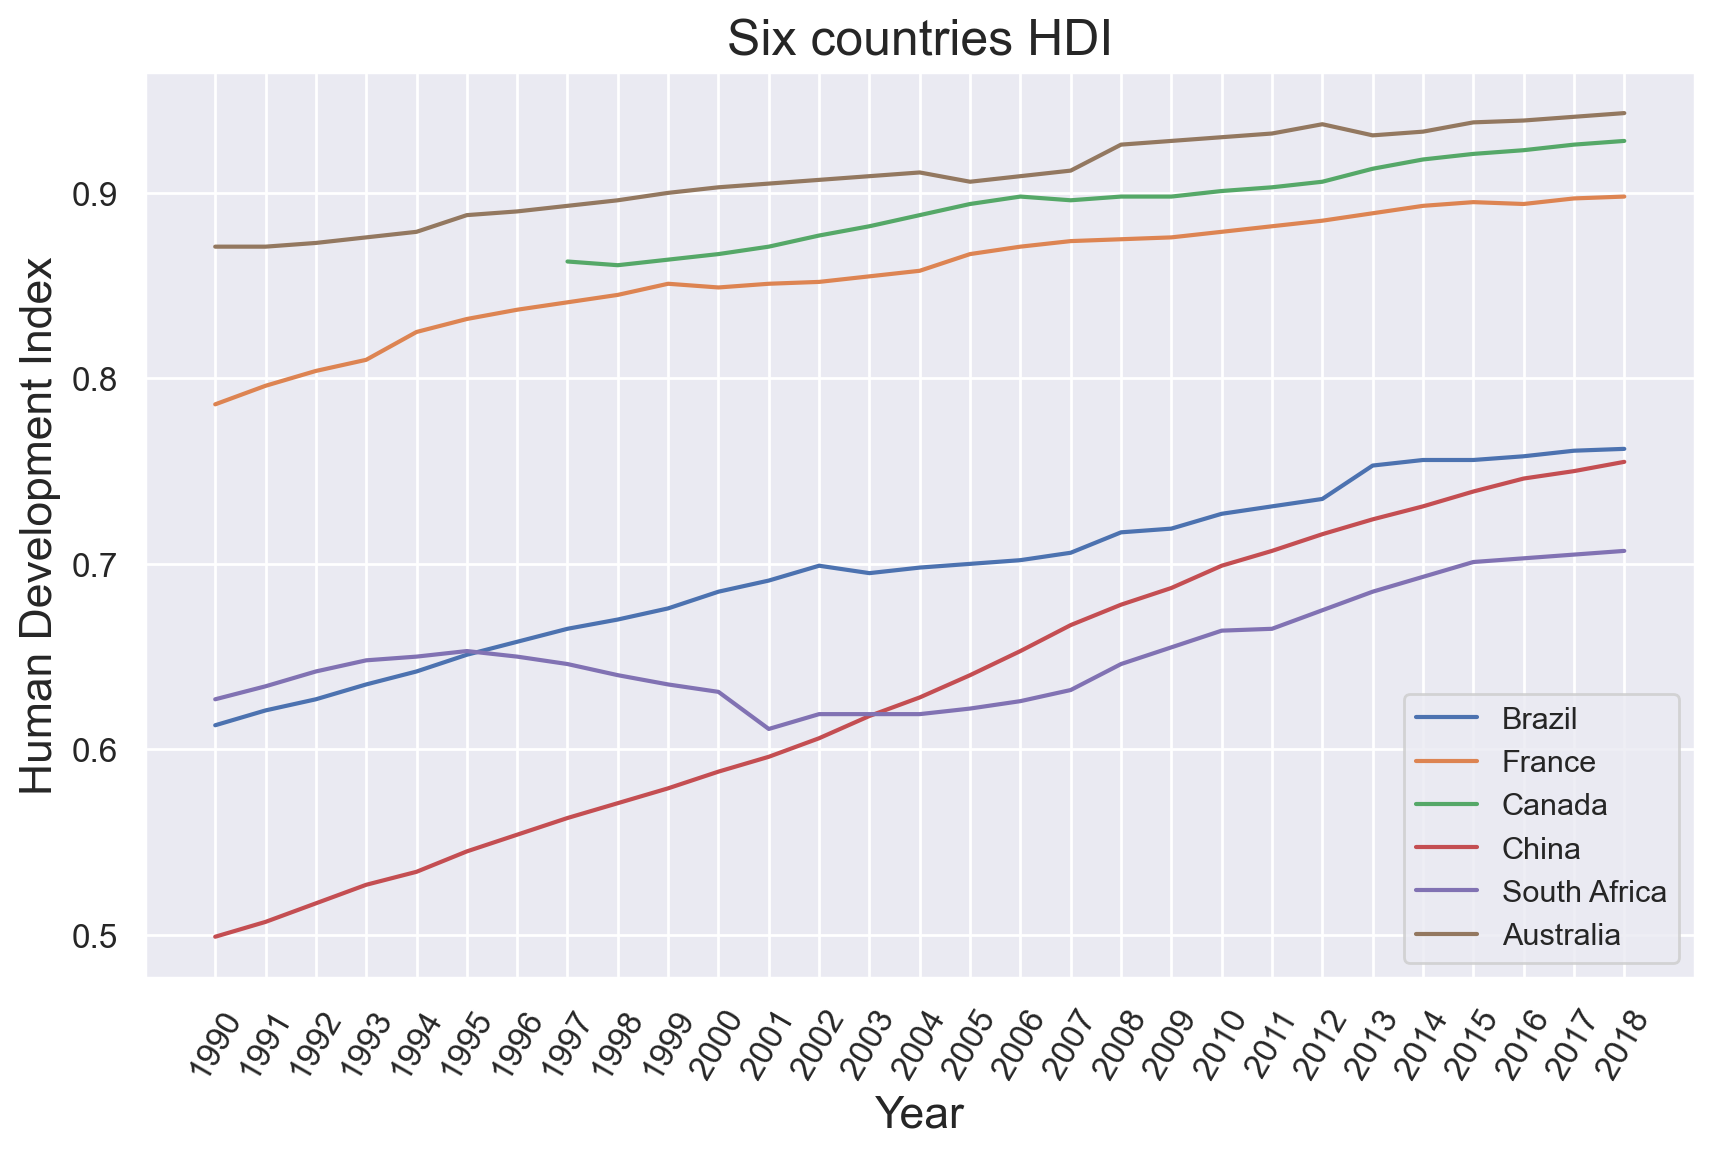

In [63]:
plt.figure(dpi=200, figsize=(10,6))

sns.set(style="darkgrid")
sns.lineplot(data=df_six_countries, x="year", y="human_development_index", hue='country')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Human Development Index', fontsize=16)

plt.title('Six countries HDI', fontsize=18)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.savefig('Six countris HDI.png')

### GDP & Life

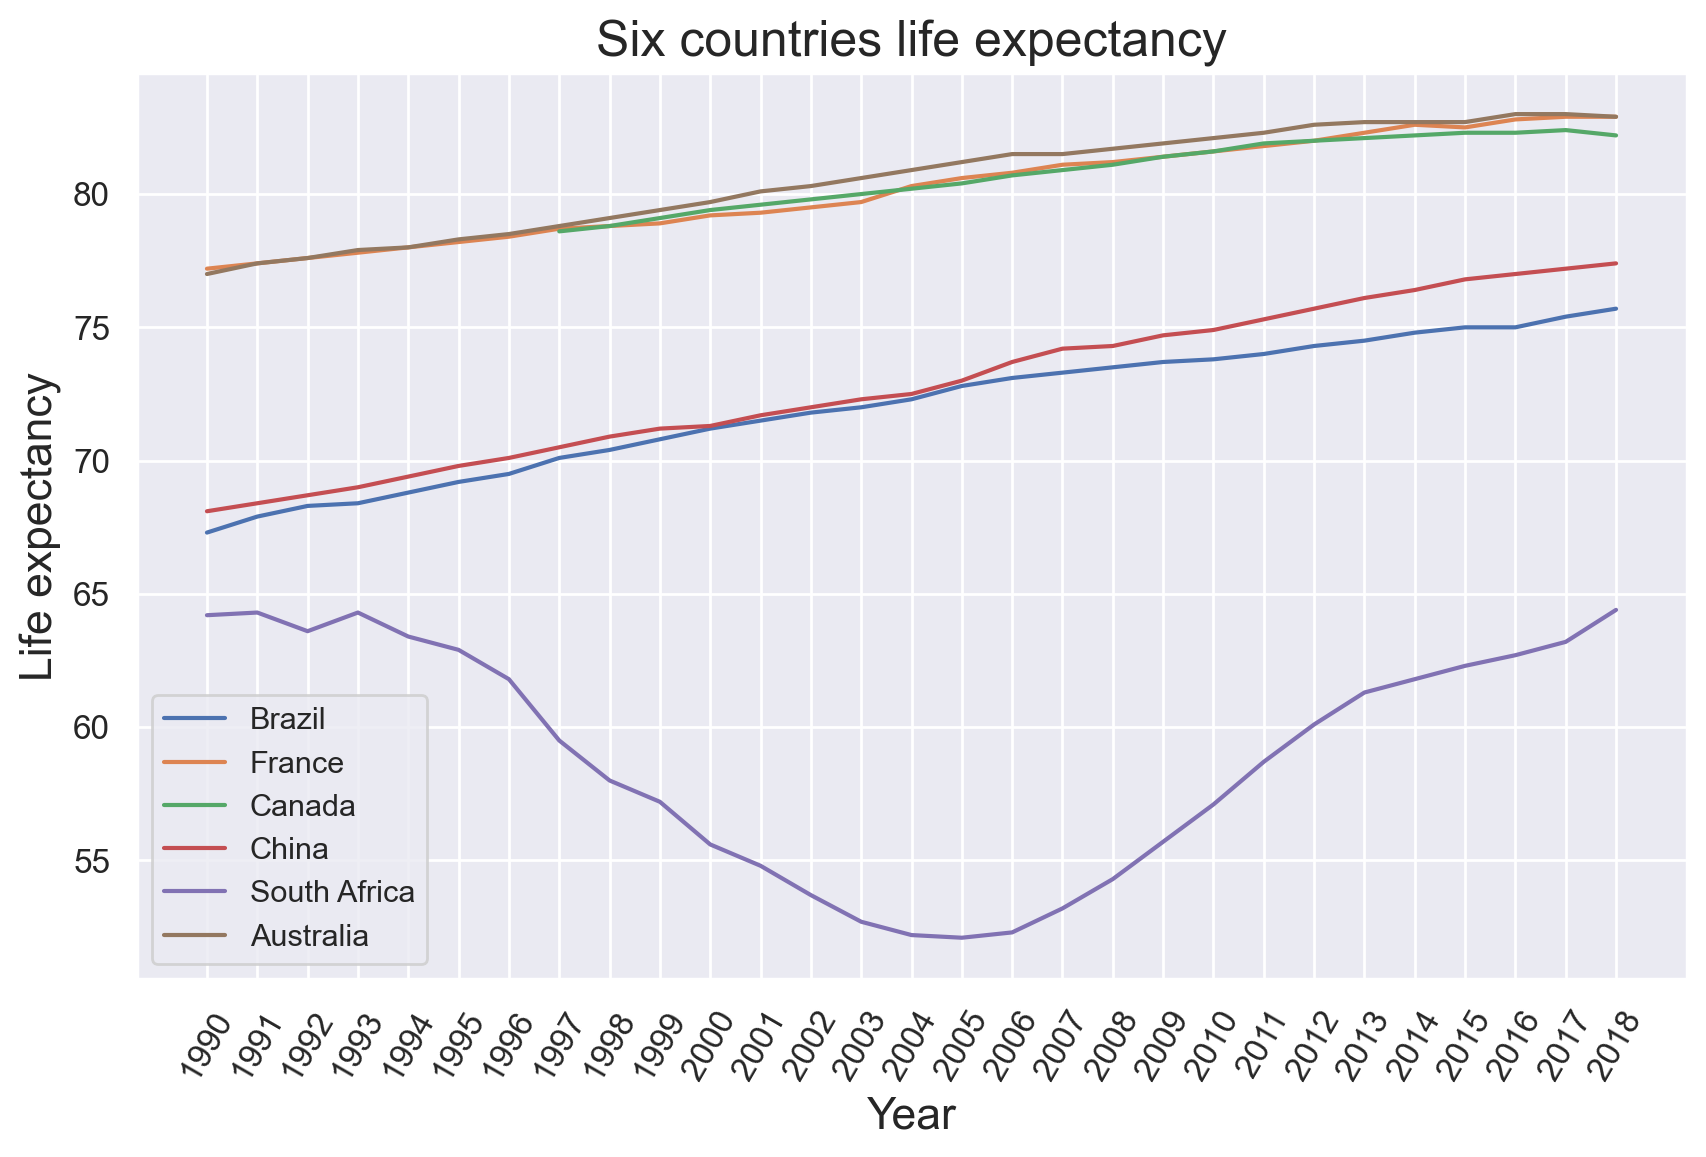

In [64]:
plt.figure(dpi=200, figsize=(10,6))

sns.set(style="darkgrid")
sns.lineplot(data=df_six_countries, x="year", y="life_expectancy", hue='country')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Life expectancy', fontsize=16)

plt.title('Six countries life expectancy', fontsize=18)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.savefig('Six countris life expectancygrowth.png')

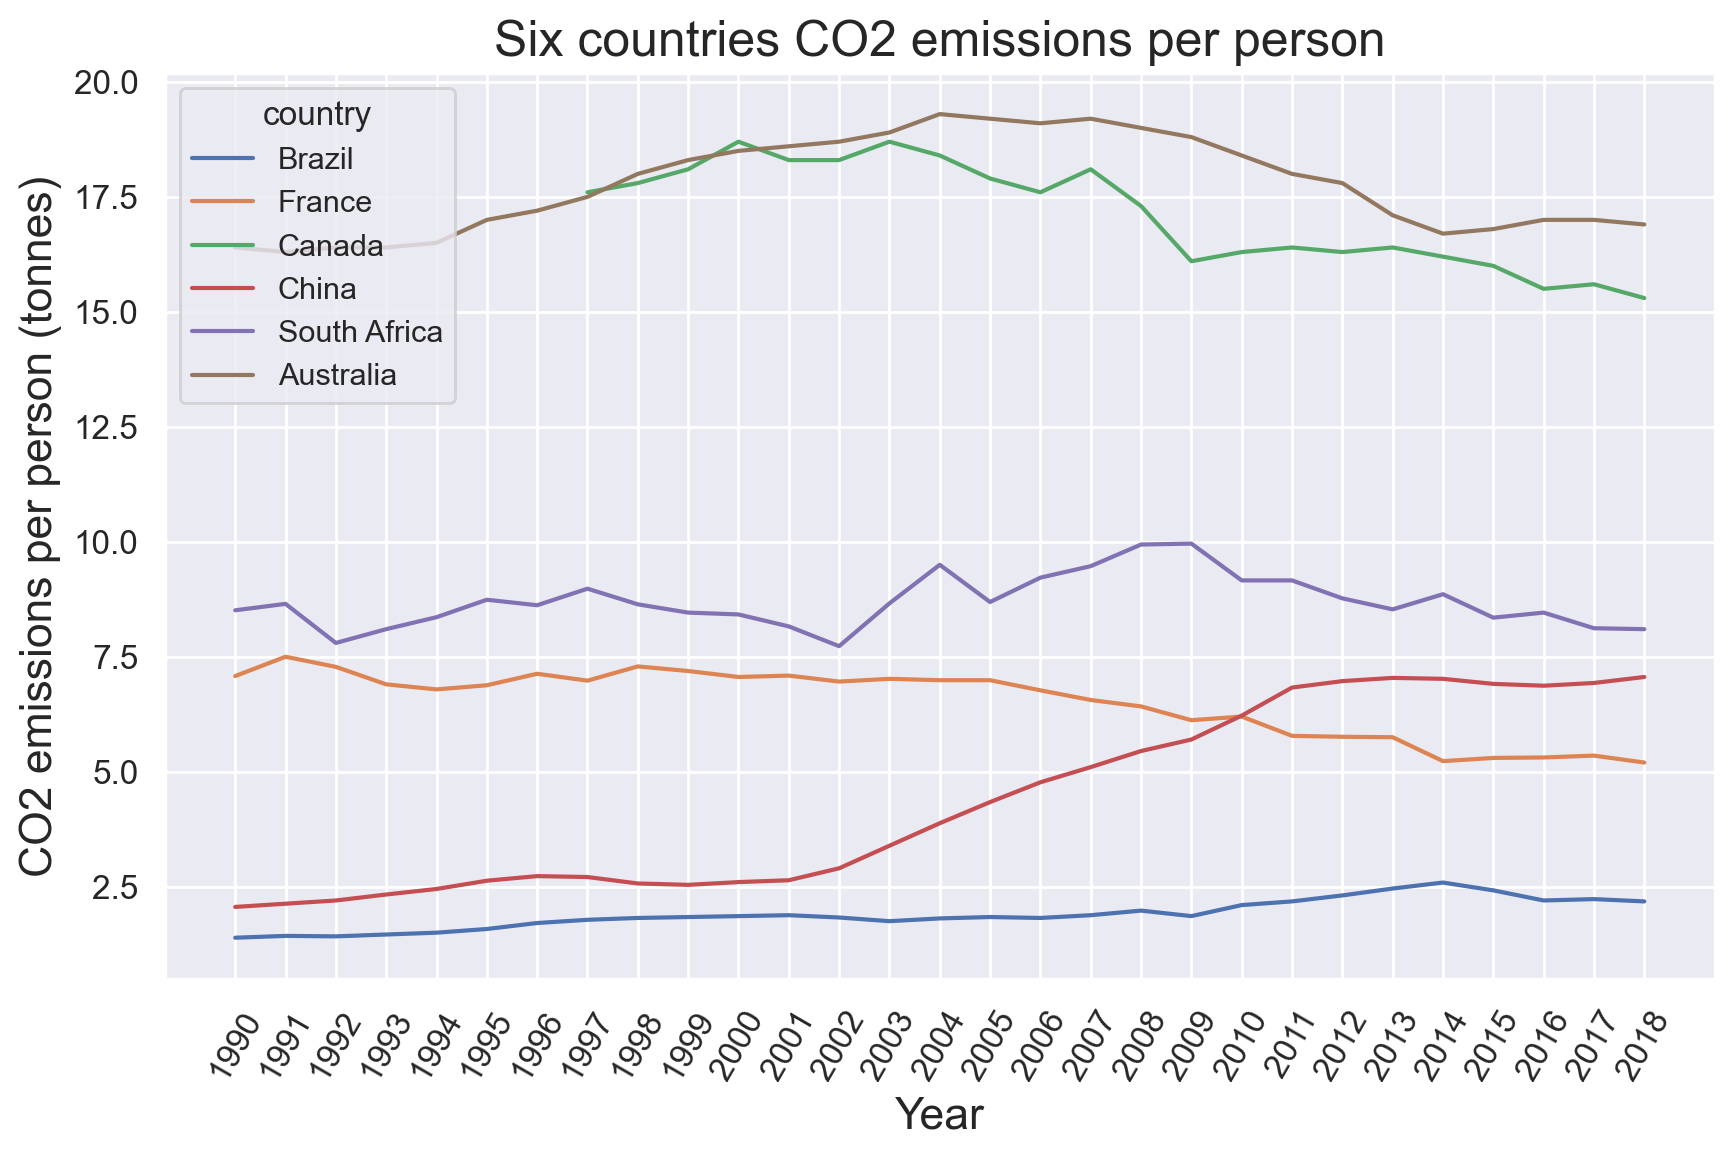

In [65]:
plt.figure(dpi=200, figsize=(10,6))
sns.set(style="darkgrid")
sns.lineplot(data=df_six_countries, x="year", y="emissions_per_person", hue='country')

plt.xlabel('Year', fontsize=16)
plt.ylabel('CO2 emissions per person (tonnes)', fontsize=16)

plt.title('Six countries CO2 emissions per person', fontsize=18)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
#plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad=0.)

plt.savefig('Six countris CO2 emissions per person.png')

In [66]:
Brazil_1 = df_overall[df_overall['country']=='Brazil']
France_1 = df_overall[df_overall['country']=='France']
Canada_1 = df_overall[df_overall['country']=='Canada']
China_1 = df_overall[df_overall['country']=='China']
South_Africa_1 = df_overall[df_overall['country']=='South Africa']
Australia_1 = df_overall[df_overall['country']=='Australia']

In [67]:
frames_1 = [Brazil_1,France_1,Canada_1,China_1,South_Africa_1,Australia_1]
df_six_countries_1=pd.concat(frames_1)
df_six_countries_1

,country,year,gdp_per_capita,human_development_index,income_per_person,life_expectancy,total_health_spending,emissions_per_person,region
306,Brazil,1995,6580.0,0.651,11300.0,69.2,6.65,1.58,Americas
307,Brazil,1996,6620.0,0.658,11300.0,69.5,6.85,1.71,Americas
308,Brazil,1997,6740.0,0.665,11500.0,70.1,6.81,1.78,Americas
309,Brazil,1998,6660.0,0.670,11400.0,70.4,6.74,1.82,Americas
310,Brazil,1999,6600.0,0.676,11300.0,70.8,7.09,1.84,Americas
...,...,...,...,...,...,...,...,...,...
113,Australia,2006,50900.0,0.909,42700.0,81.5,8.46,19.1,Oceania
114,Australia,2007,52500.0,0.912,44100.0,81.5,8.48,19.2,Oceania
115,Australia,2008,53300.0,0.926,44700.0,81.7,8.73,19.0,Oceania
116,Australia,2009,53200.0,0.928,44600.0,81.9,8.73,18.8,Oceania


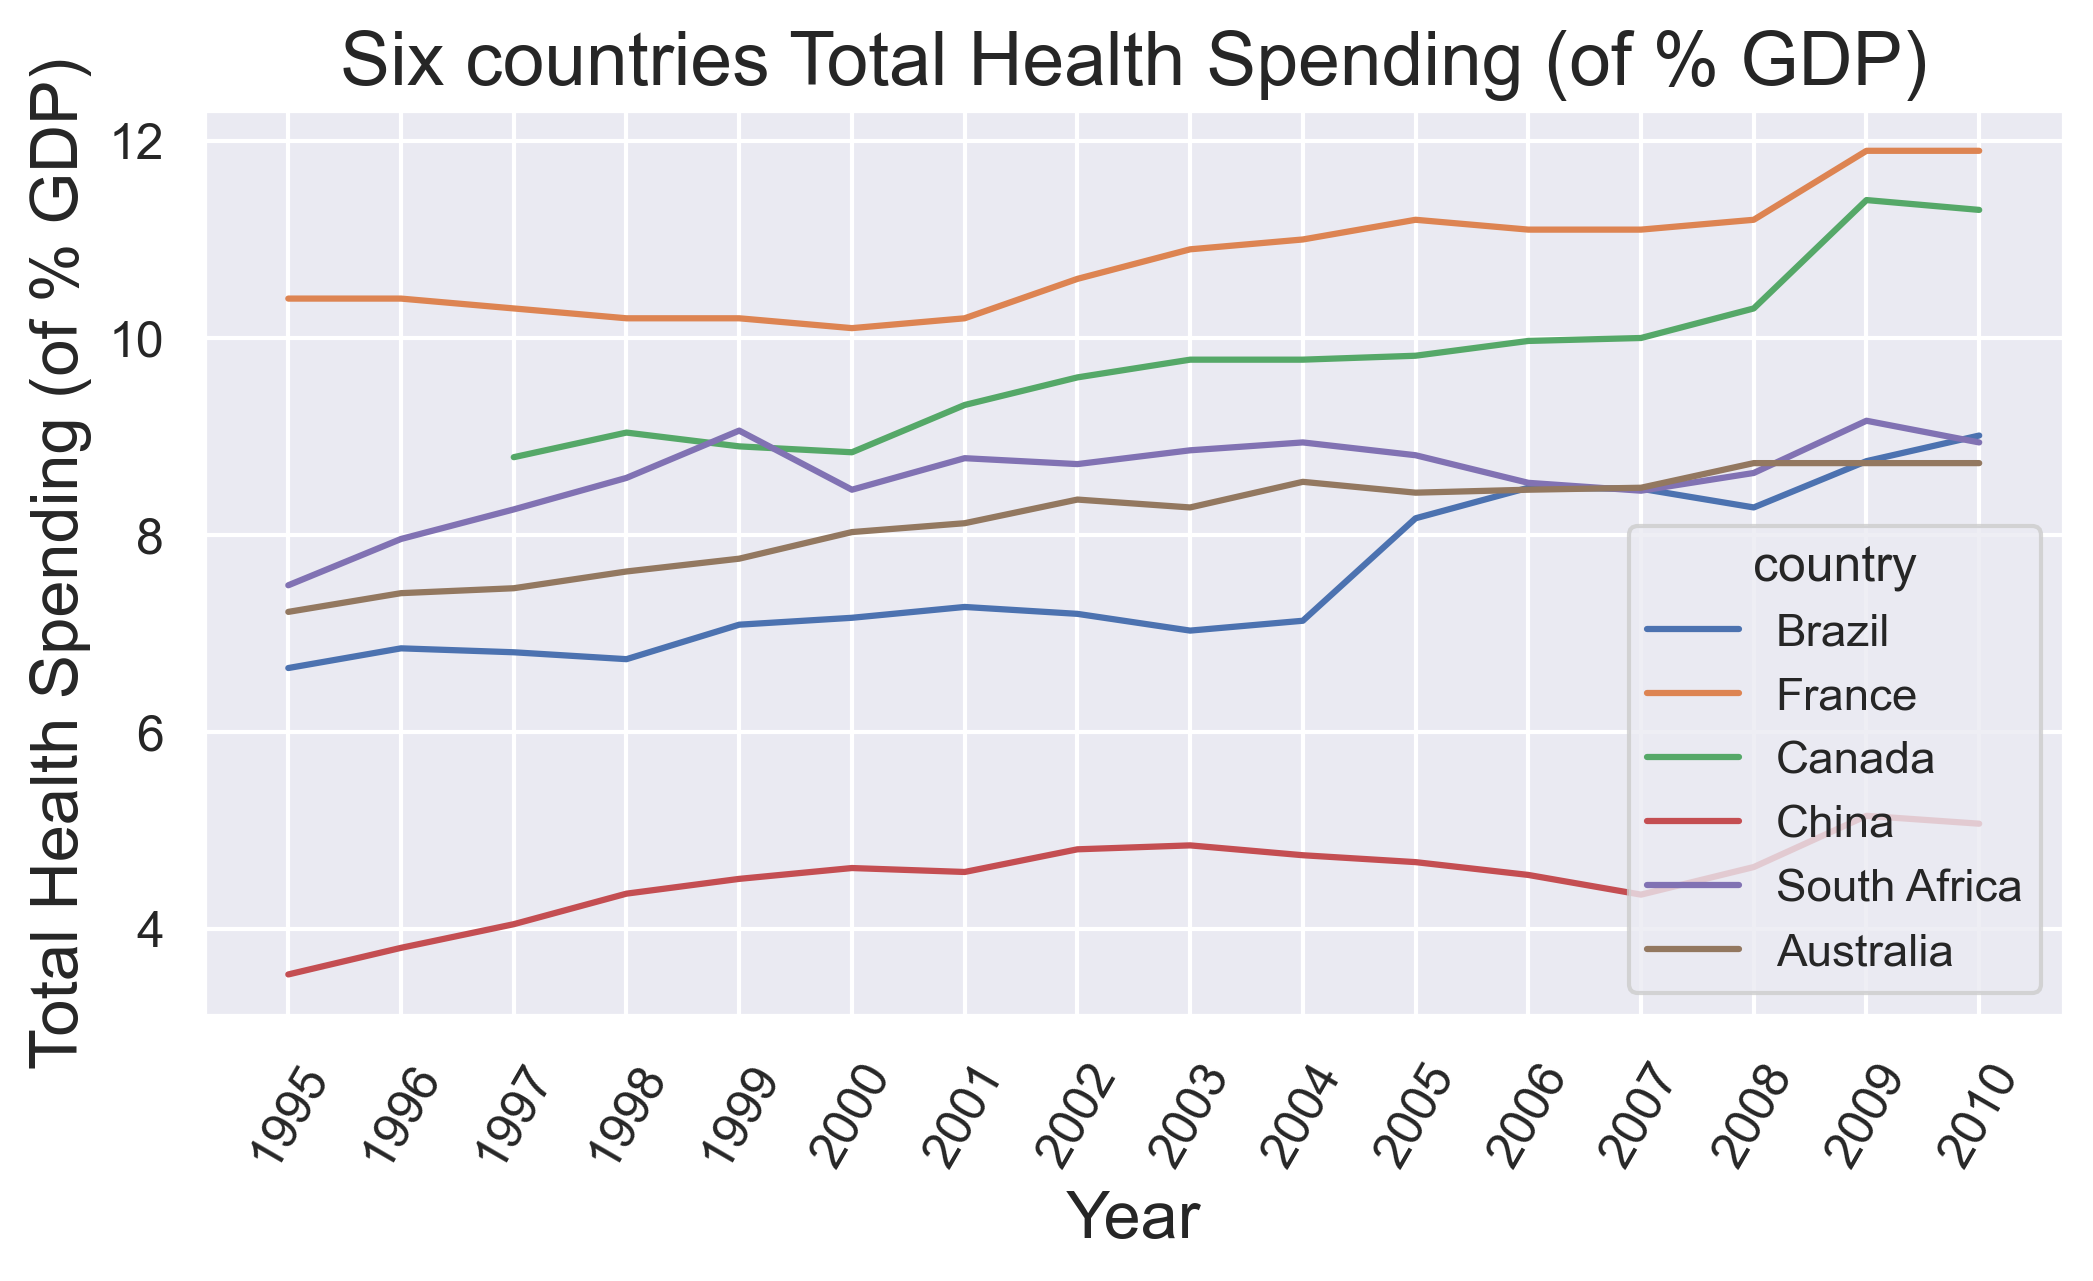

In [68]:
plt.figure(dpi=300, figsize=(8,4))
sns.set(style="darkgrid")
sns.lineplot(data=df_six_countries_1, x="year", y="total_health_spending", hue='country')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Health Spending (of % GDP)', fontsize=16)

plt.title('Six countries Total Health Spending (of % GDP)', fontsize=18)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Six countris Total Health Spending.png')